   # Analyse de données RNA-seq - Exploration initiale

   Ce notebook contient l'analyse exploratoire initiale des données RNA-seq.

In [2]:
# Import des bibliothèques nécessaires
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de l'affichage
sc.settings.set_figure_params(dpi=100, frameon=False)
sc.settings.verbosity = 3

# Utilisation d'un style matplotlib standard
plt.style.use('default')

# Affichage des versions des bibliothèques
print(f"Scanpy version: {sc.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Scanpy version: 1.10.3
Pandas version: 2.2.3
NumPy version: 2.0.2


   ## 1. Chargement des données

   Dans cette section, nous allons charger les données RNA-seq et effectuer une première exploration.

In [3]:
# Chargement du jeu de données pbmc3k
adata = sc.datasets.pbmc3k()

# Affichage des informations de base
print(adata)
print(f"\nNombre de cellules: {adata.n_obs}")
print(f"Nombre de gènes: {adata.n_vars}")

# Afficher les premières lignes des métadonnées des cellules
print("\nMétadonnées des cellules :")
print(adata.obs.head())

# Afficher les premières lignes des métadonnées des gènes
print("\nMétadonnées des gènes :")
print(adata.var.head())

try downloading from url
https://falexwolf.de/data/pbmc3k_raw.h5ad
... this may take a while but only happens once


  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

Nombre de cellules: 2700
Nombre de gènes: 32738

Métadonnées des cellules :
Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1]

Métadonnées des gènes :
                     gene_ids
index                        
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945


   ## 2. Analyse de la qualité des données

   Nous allons examiner la qualité des données en regardant :
   - Le nombre de gènes par cellule
   - Le nombre d'UMIs par cellule
   - La distribution des mitochondriaux


Statistiques de base des métriques de qualité :
       n_genes_by_counts  total_counts
count        2700.000000   2700.000000
mean          846.994074   2366.900391
std           282.104964   1094.262085
min           212.000000    548.000000
25%           690.000000   1757.750000
50%           817.000000   2197.000000
75%           953.250000   2763.000000
max          3422.000000  15844.000000


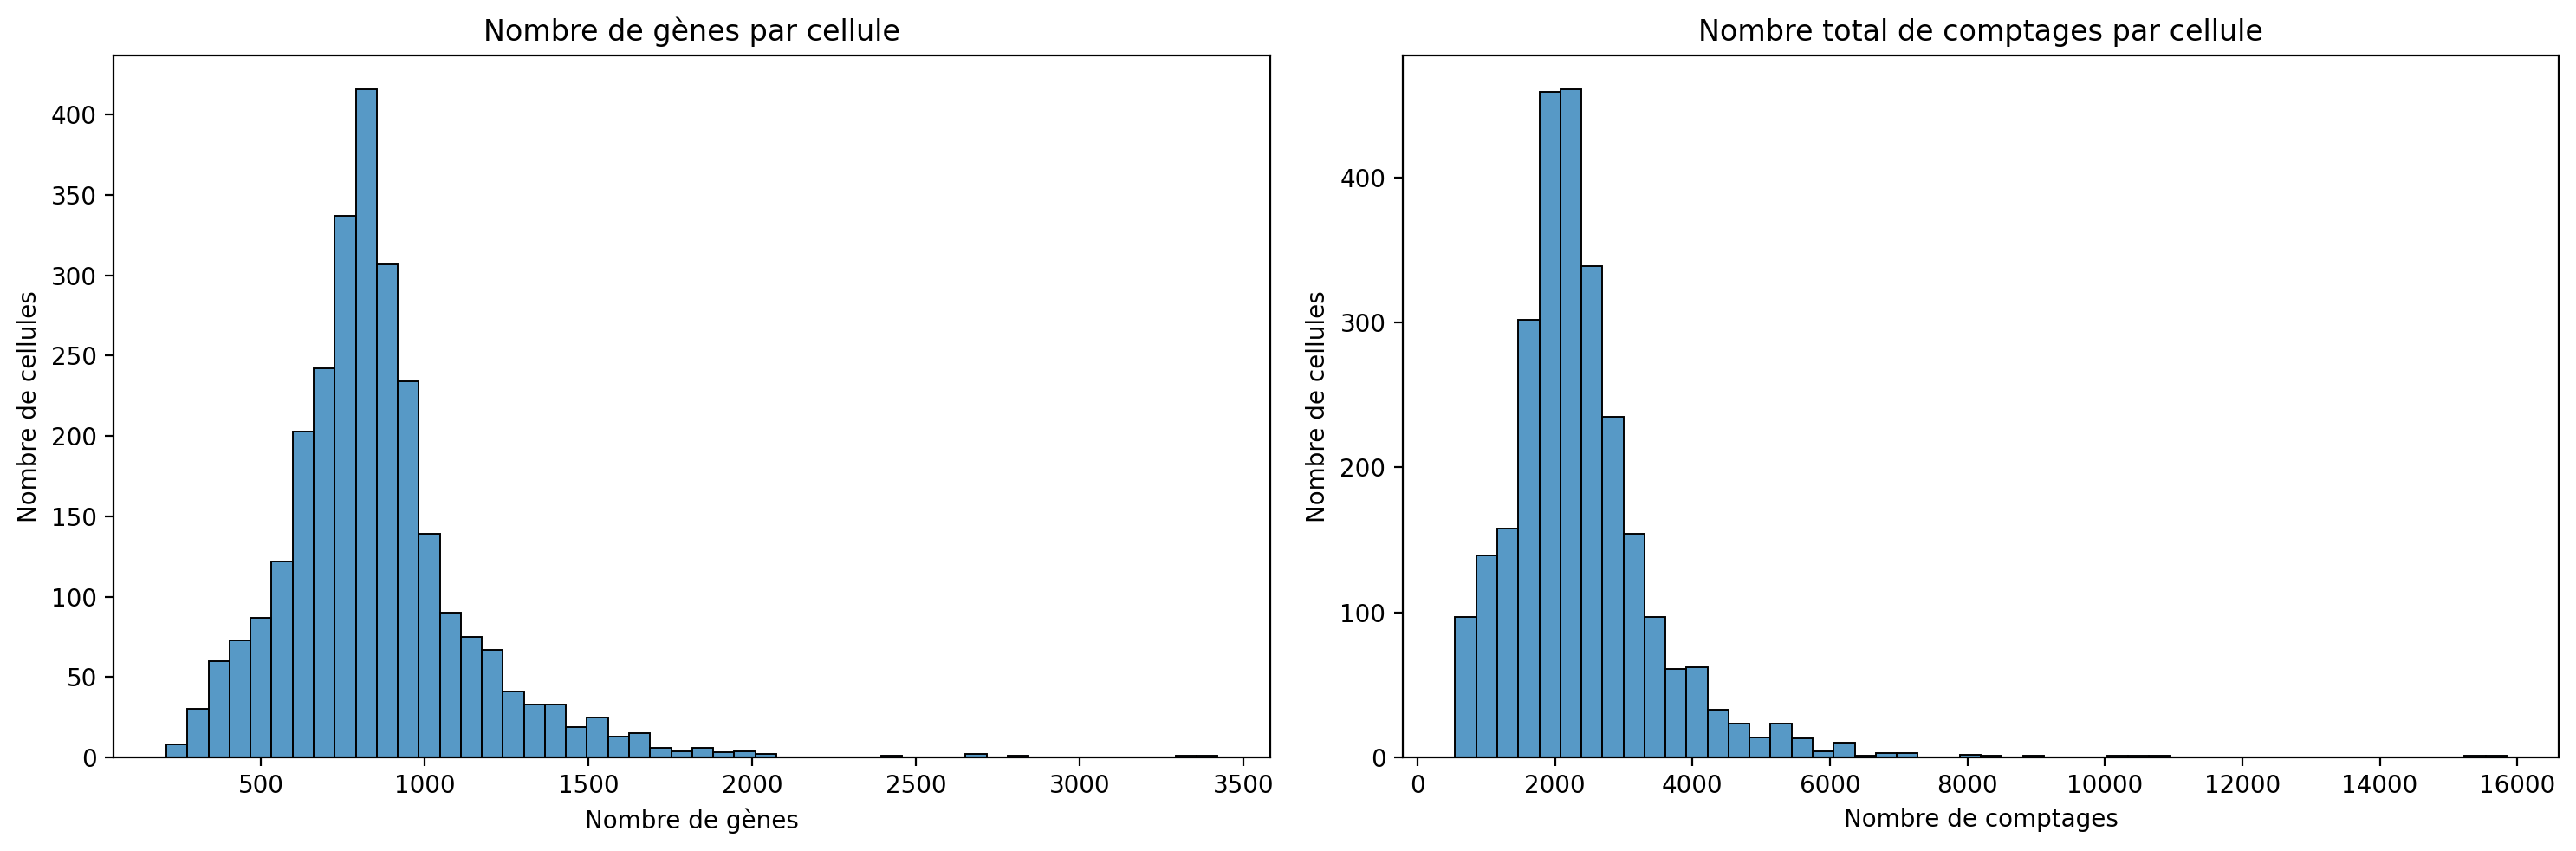

In [4]:
# Calcul des métriques de qualité
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

# Création d'une figure avec 2 sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme du nombre de gènes par cellule
sns.histplot(data=adata.obs, x='n_genes_by_counts', bins=50, ax=axs[0])
axs[0].set_title('Nombre de gènes par cellule')
axs[0].set_xlabel('Nombre de gènes')
axs[0].set_ylabel('Nombre de cellules')

# Histogramme du nombre total de comptages par cellule
sns.histplot(data=adata.obs, x='total_counts', bins=50, ax=axs[1])
axs[1].set_title('Nombre total de comptages par cellule')
axs[1].set_xlabel('Nombre de comptages')
axs[1].set_ylabel('Nombre de cellules')

plt.tight_layout()

# Afficher les statistiques de base
print("\nStatistiques de base des métriques de qualité :")
print(adata.obs[['n_genes_by_counts', 'total_counts']].describe())

## 3. Etape de filtrage des cellules et des gènes

Nous allons 
* Afficher les statistiques initiales du jeu de données
* Filtrer les cellules en :
    * Supprimant celles avec moins de 200 gènes
    * Supprimant celles avec plus de 2500 comptages
* Filtrer les gènes en supprimant ceux exprimés dans moins de 3 cellules
* Afficher les nouvelles statistiques après filtrage
* Visualiser les distributions des métriques après filtrage

Statistiques avant filtrage :
Nombre de cellules : 2700
Nombre de gènes : 32738
filtered out 942 cells that have more than 2500 counts
filtered out 20341 genes that are detected in less than 3 cells

Statistiques après filtrage :
Nombre de cellules : 1758
Nombre de gènes : 12397


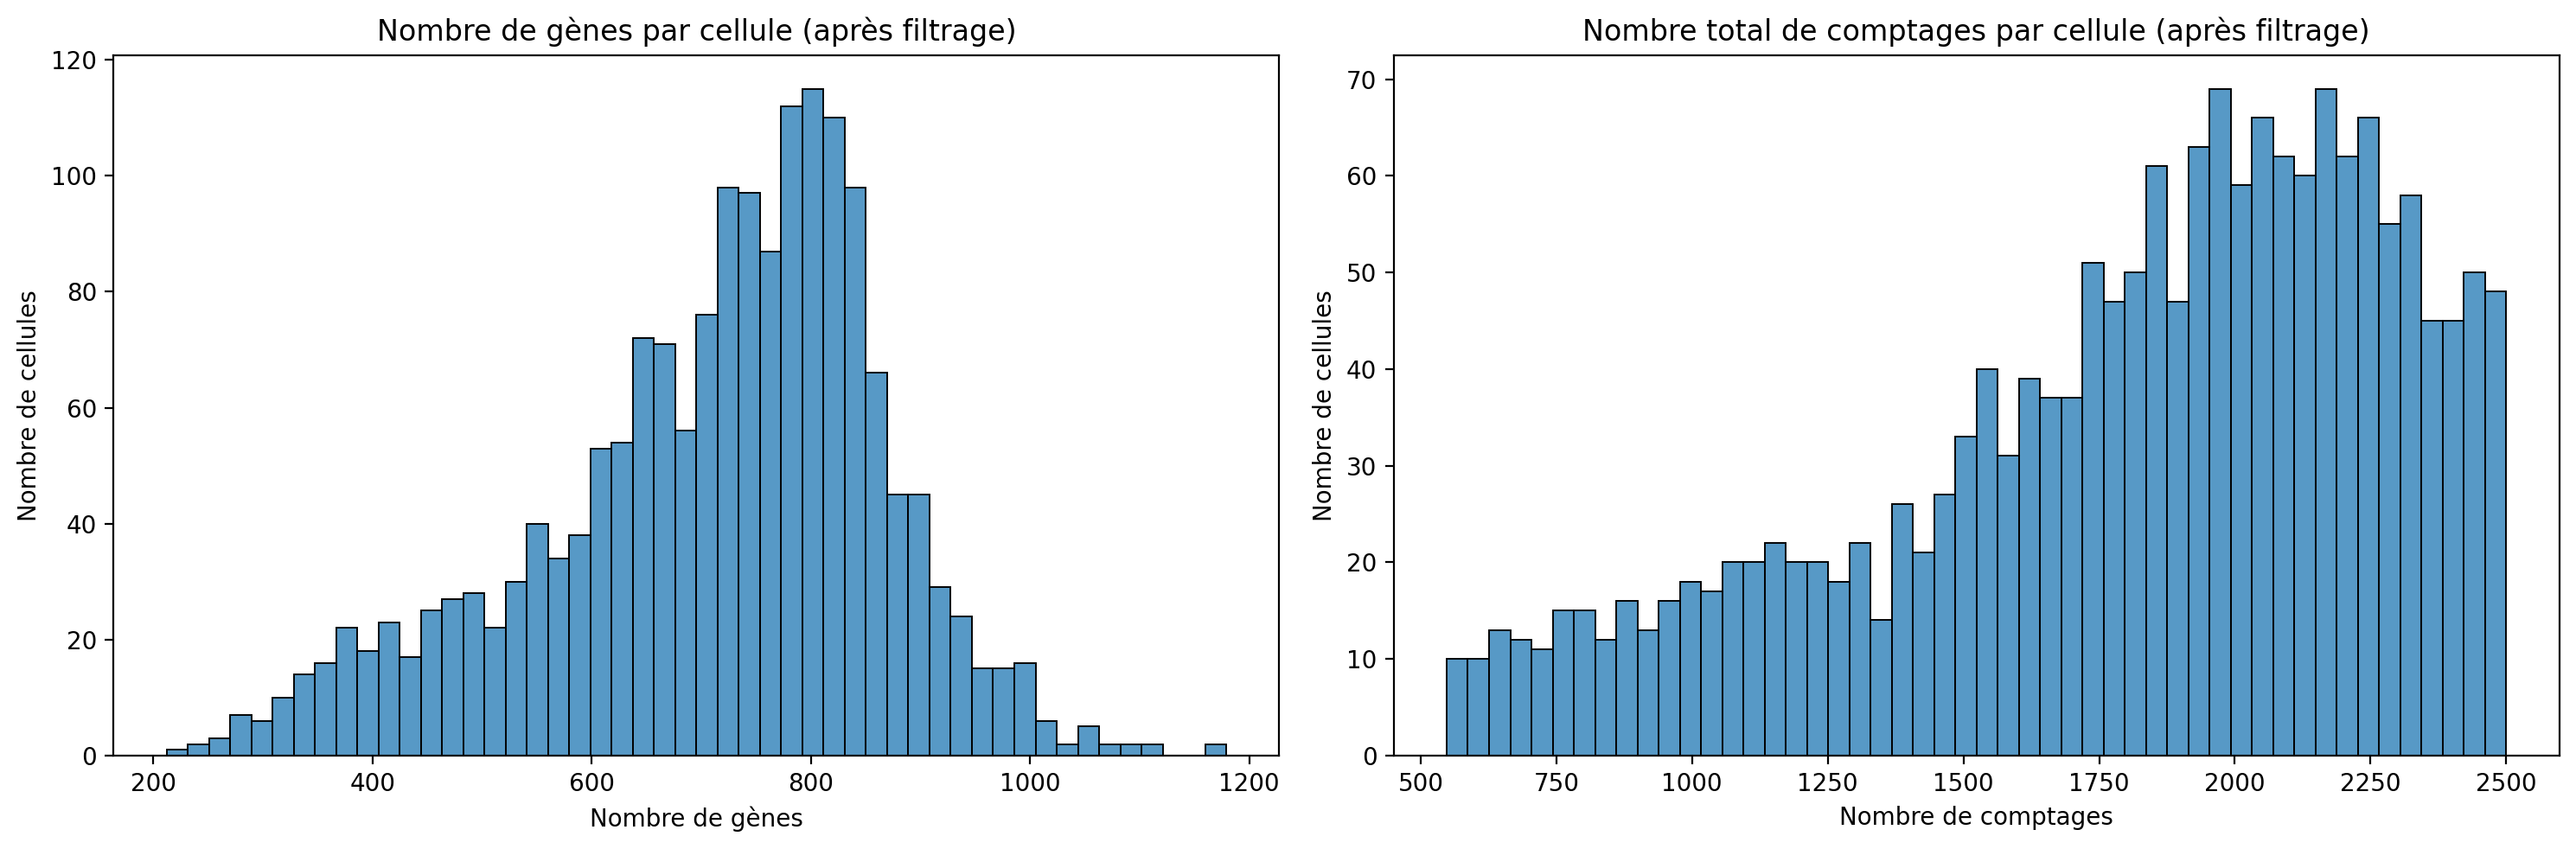

In [5]:
# Afficher les statistiques avant filtrage
print("Statistiques avant filtrage :")
print(f"Nombre de cellules : {adata.n_obs}")
print(f"Nombre de gènes : {adata.n_vars}")

# Filtrage des cellules
# Supprimer les cellules avec trop peu de gènes (< 200)
# Supprimer les cellules avec trop de comptages (> 2500)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, max_counts=2500)

# Filtrage des gènes
# Supprimer les gènes exprimés dans moins de 3 cellules
sc.pp.filter_genes(adata, min_cells=3)

# Afficher les statistiques après filtrage
print("\nStatistiques après filtrage :")
print(f"Nombre de cellules : {adata.n_obs}")
print(f"Nombre de gènes : {adata.n_vars}")

# Visualiser la distribution des métriques après filtrage
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme du nombre de gènes par cellule après filtrage
sns.histplot(data=adata.obs, x='n_genes_by_counts', bins=50, ax=axs[0])
axs[0].set_title('Nombre de gènes par cellule (après filtrage)')
axs[0].set_xlabel('Nombre de gènes')
axs[0].set_ylabel('Nombre de cellules')

# Histogramme du nombre total de comptages par cellule après filtrage
sns.histplot(data=adata.obs, x='total_counts', bins=50, ax=axs[1])
axs[1].set_title('Nombre total de comptages par cellule (après filtrage)')
axs[1].set_xlabel('Nombre de comptages')
axs[1].set_ylabel('Nombre de cellules')

plt.tight_layout()

## 4. Normalisation des données

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Nombre de gènes hautement variables : 1661


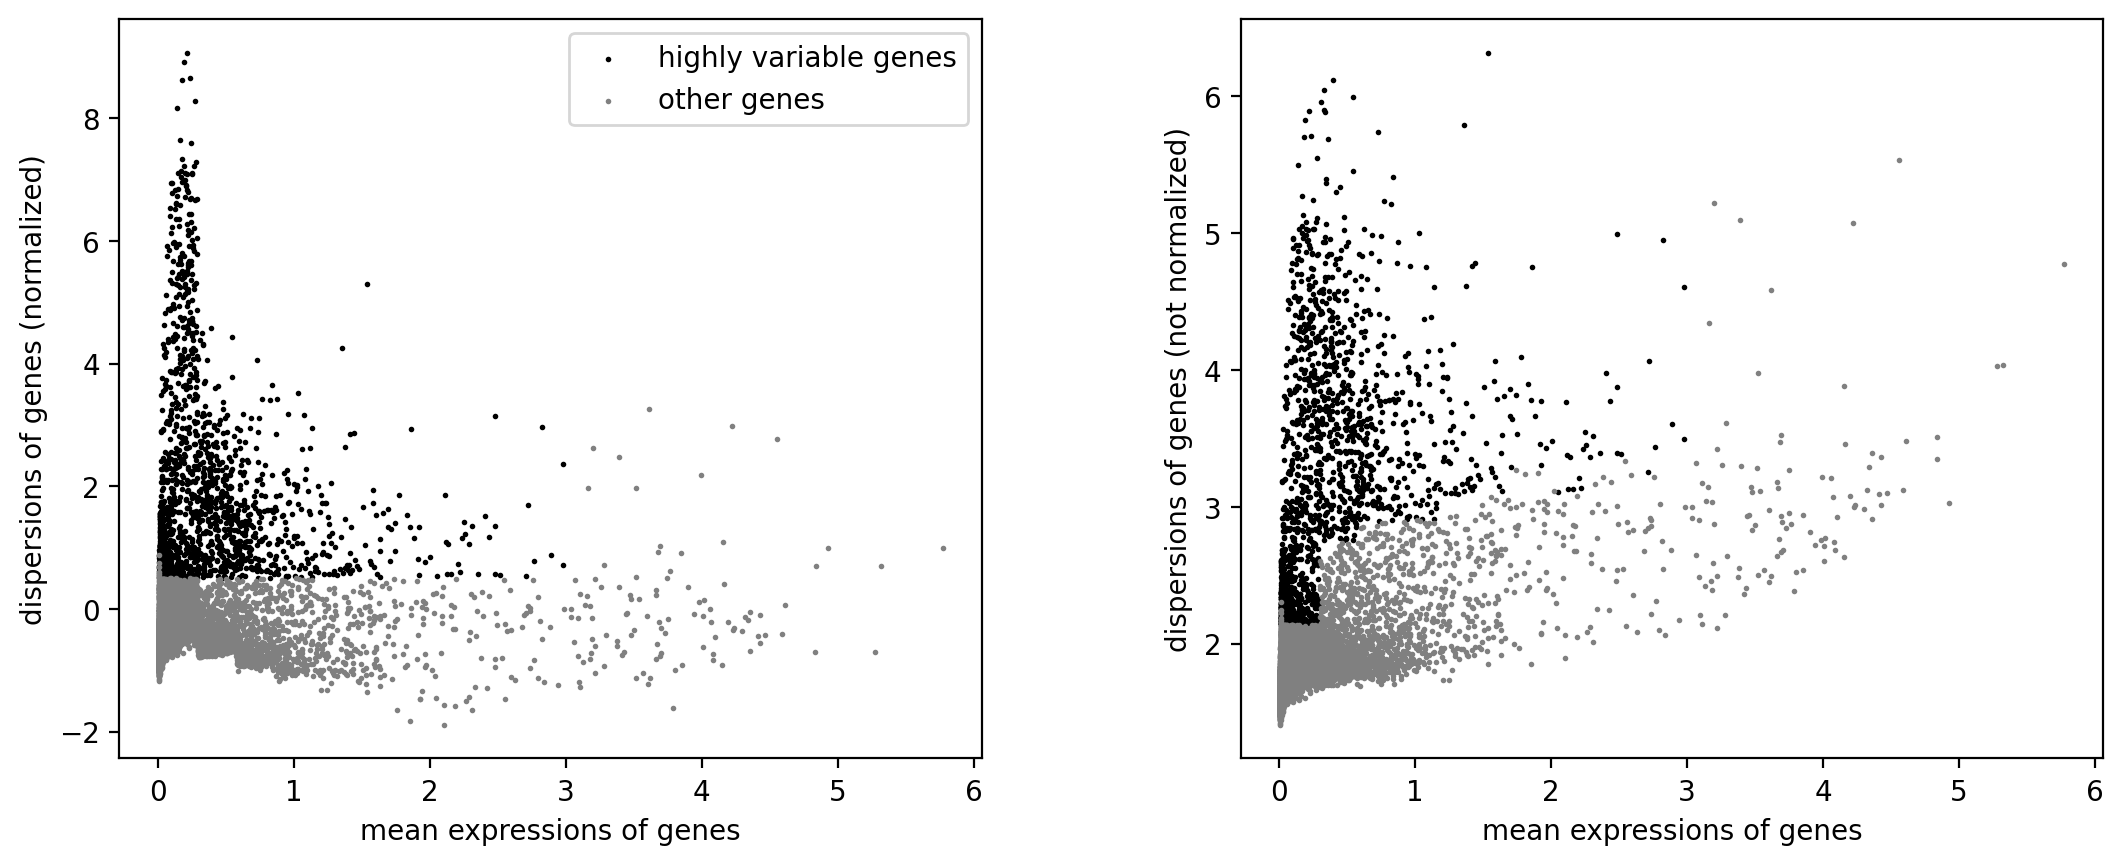


Statistiques après normalisation :
       n_genes_by_counts  total_counts
count        1758.000000   1758.000000
mean          709.453925   1805.770752
std           158.791738    481.177979
min           212.000000    548.000000
25%           619.250000   1523.000000
50%           738.000000   1913.500000
75%           819.000000   2180.750000
max          1179.000000   2500.000000


In [6]:
# Normalisation des données
# 1. Normalisation par la taille de la bibliothèque
sc.pp.normalize_total(adata, target_sum=1e4)

# 2. Transformation log1p
sc.pp.log1p(adata)

# 3. Identification des gènes hautement variables
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Afficher le nombre de gènes hautement variables
print(f"Nombre de gènes hautement variables : {sum(adata.var.highly_variable)}")

# Visualiser la dispersion des gènes
sc.pl.highly_variable_genes(adata)

# Afficher les statistiques de base après normalisation
print("\nStatistiques après normalisation :")
print(adata.obs[['n_genes_by_counts', 'total_counts']].describe())

## 5. Analyse en composantes principales

1. Sélectionner uniquement les gènes hautement variables pour l'analyse
2. Mettre à l'échelle les données
3. Calculer la PCA
4. Visualiser la variance expliquée par chaque composante
5. Créer un graphique de dispersion des cellules selon les deux premières composantes principales
6. Afficher les gènes qui contribuent le plus à la première composante principale

computing PCA
    with n_comps=50
    finished (0:00:00)


<Figure size 1000x800 with 0 Axes>

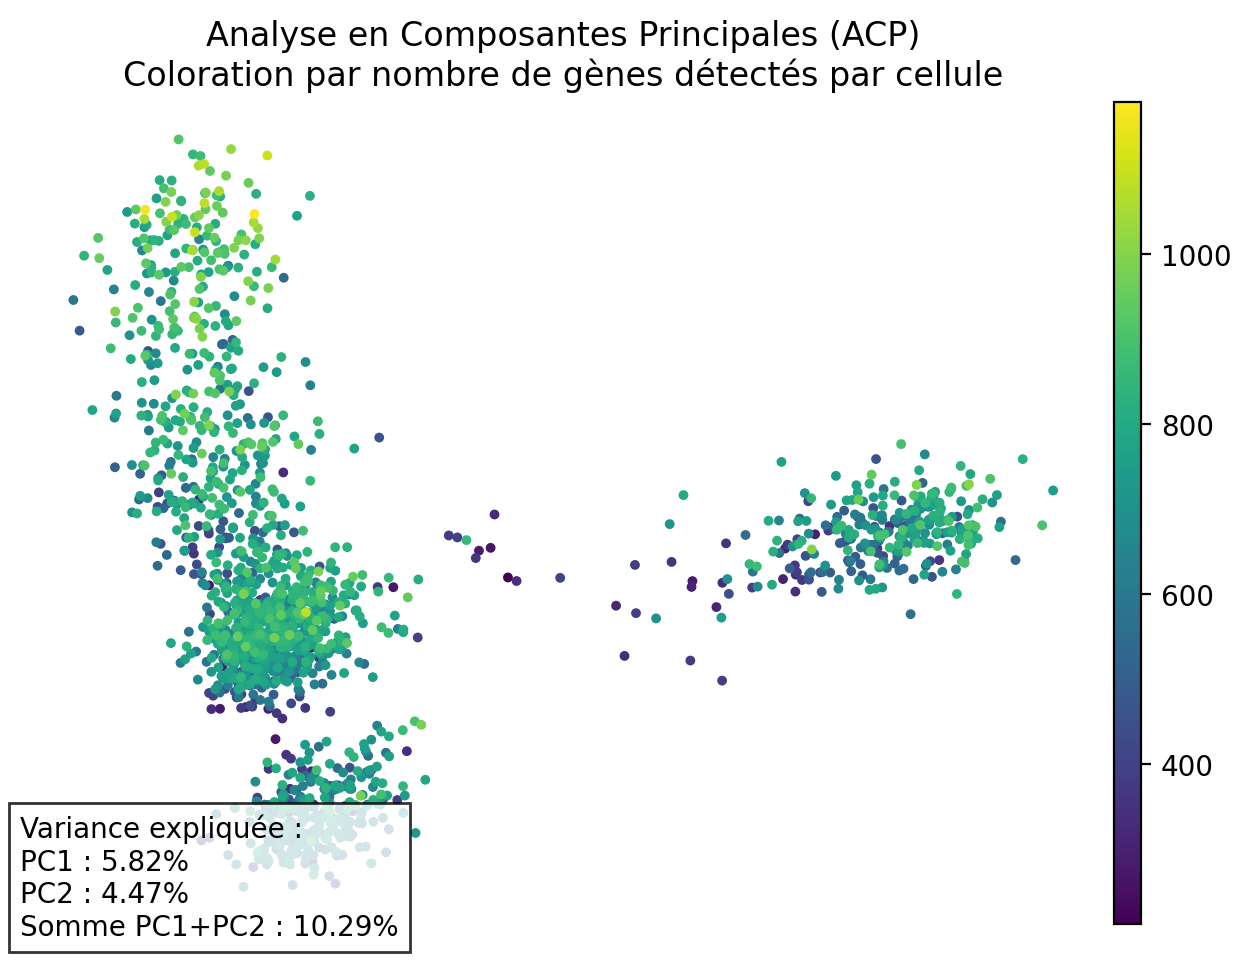

In [14]:
# 1. D'abord, effectuer l'analyse PCA
sc.pp.pca(adata, n_comps=50)

# 2. Ensuite, créer la visualisation
plt.figure(figsize=(10, 8))

# Création du graphique PCA
ax = sc.pl.pca(
    adata,
    color='n_genes_by_counts',
    title='Analyse en Composantes Principales (ACP)\nColoration par nombre de gènes détectés par cellule',
    size=50,
    show=False  # Ne pas afficher immédiatement
)

# Ajout des labels d'axes
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Somme de la variance expliquée par les 40 premières PC
variance_40pc = adata.uns["pca"]["variance_ratio"][:40].sum()
print(f"Variance expliquée par les 40 premières PC : {variance_40pc:.2%}")
# Ajout d'informations sur la variance
plt.figtext(
    0.02, 0.02,
    f'Variance expliquée :\n'
    f'PC1 : {adata.uns["pca"]["variance_ratio"][0]:.2%}\n'
    f'PC2 : {adata.uns["pca"]["variance_ratio"][1]:.2%}\n'
    f'Somme PC1+PC2 : {(adata.uns["pca"]["variance_ratio"][0] + adata.uns["pca"]["variance_ratio"][1]):.2%}\n'
    f'Somme 40 PC : {variance_40pc:.2%}',
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.8)
)

# Ajustement de la mise en page
plt.tight_layout()

# Sauvegarde du graphique
plt.savefig('pca_analysis_detailed.pdf', bbox_inches='tight', dpi=300)
plt.show()


## 5. Analyse de Clustering

Dans cette étape, nous allons :
1. Calculer le graphe de voisinage
2. Effectuer le clustering des cellules
3. Visualiser les résultats sur une carte t-SNE et UMAP
4. Analyser les marqueurs de chaque cluster

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 40
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:01)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
   

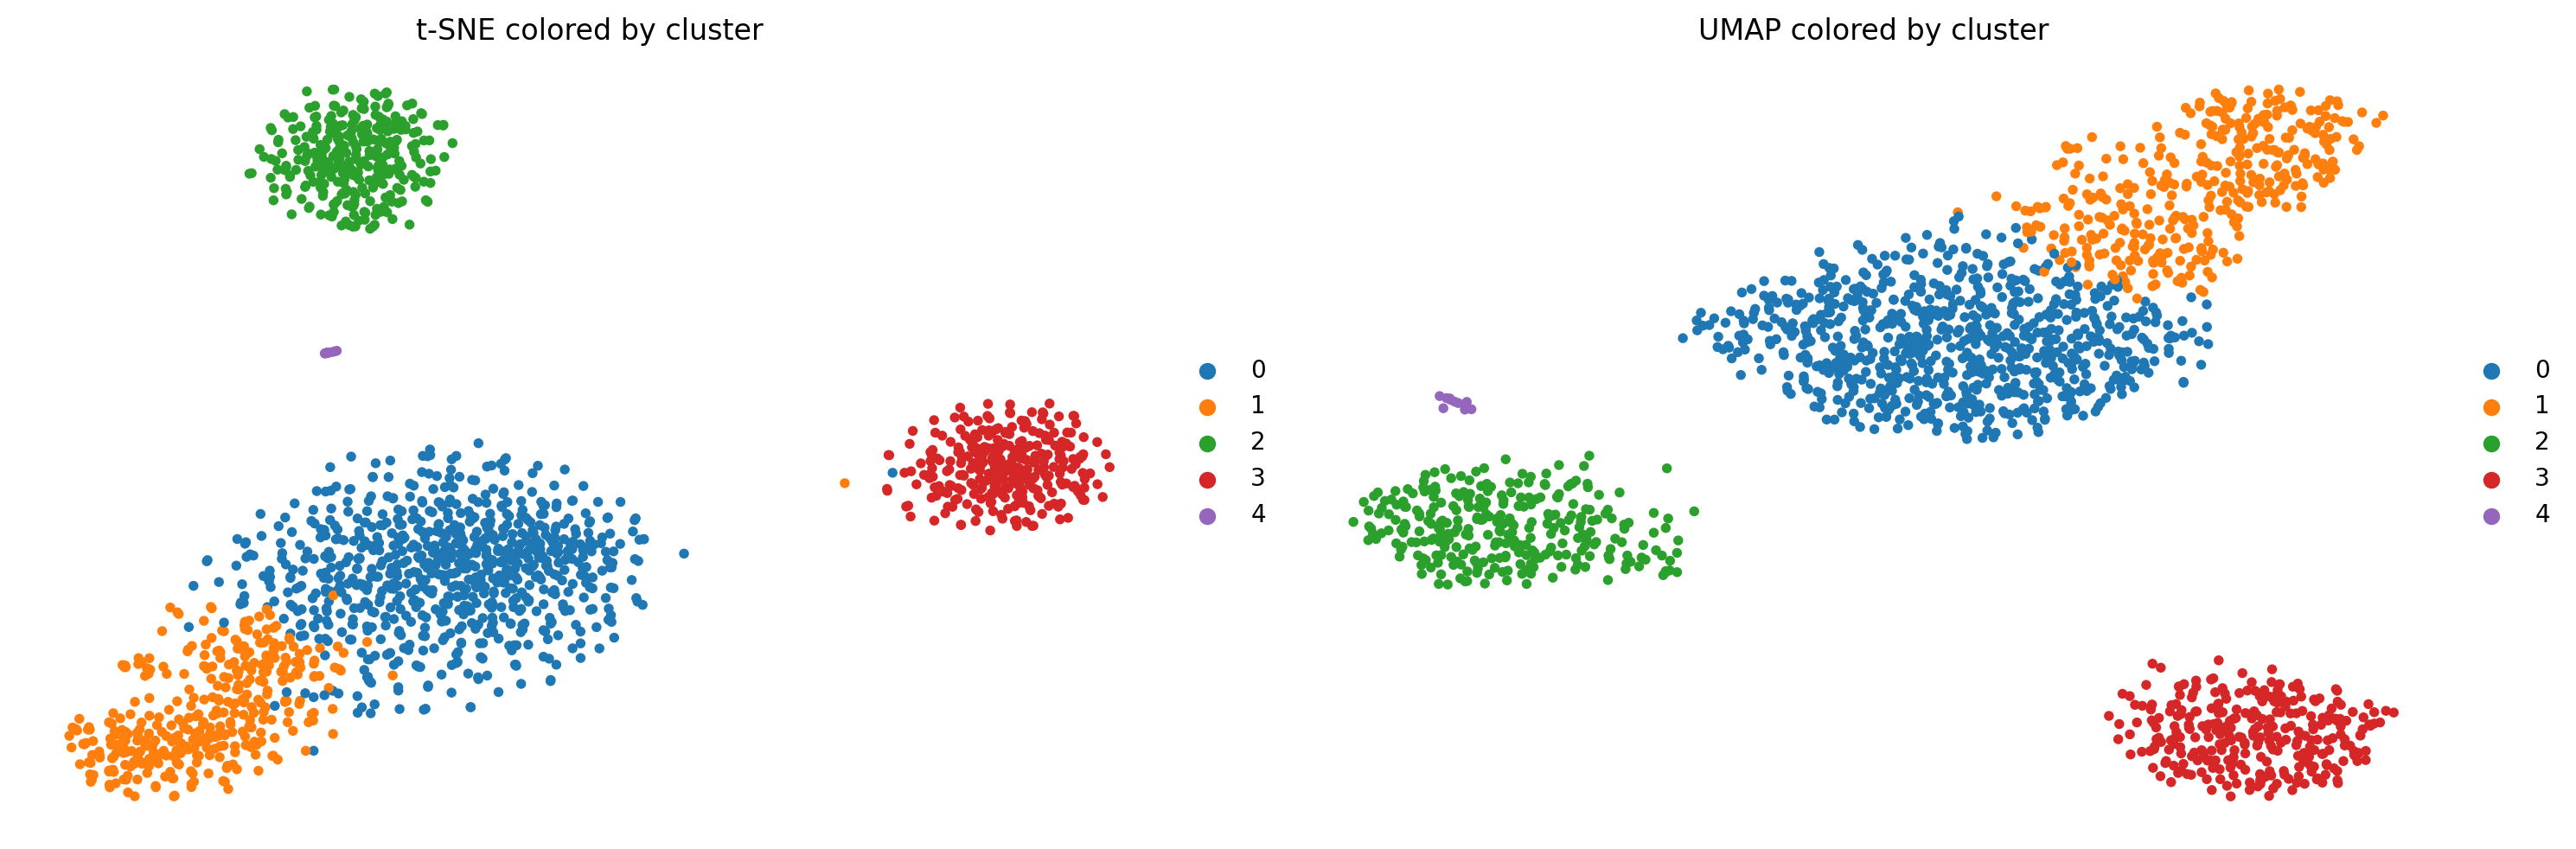

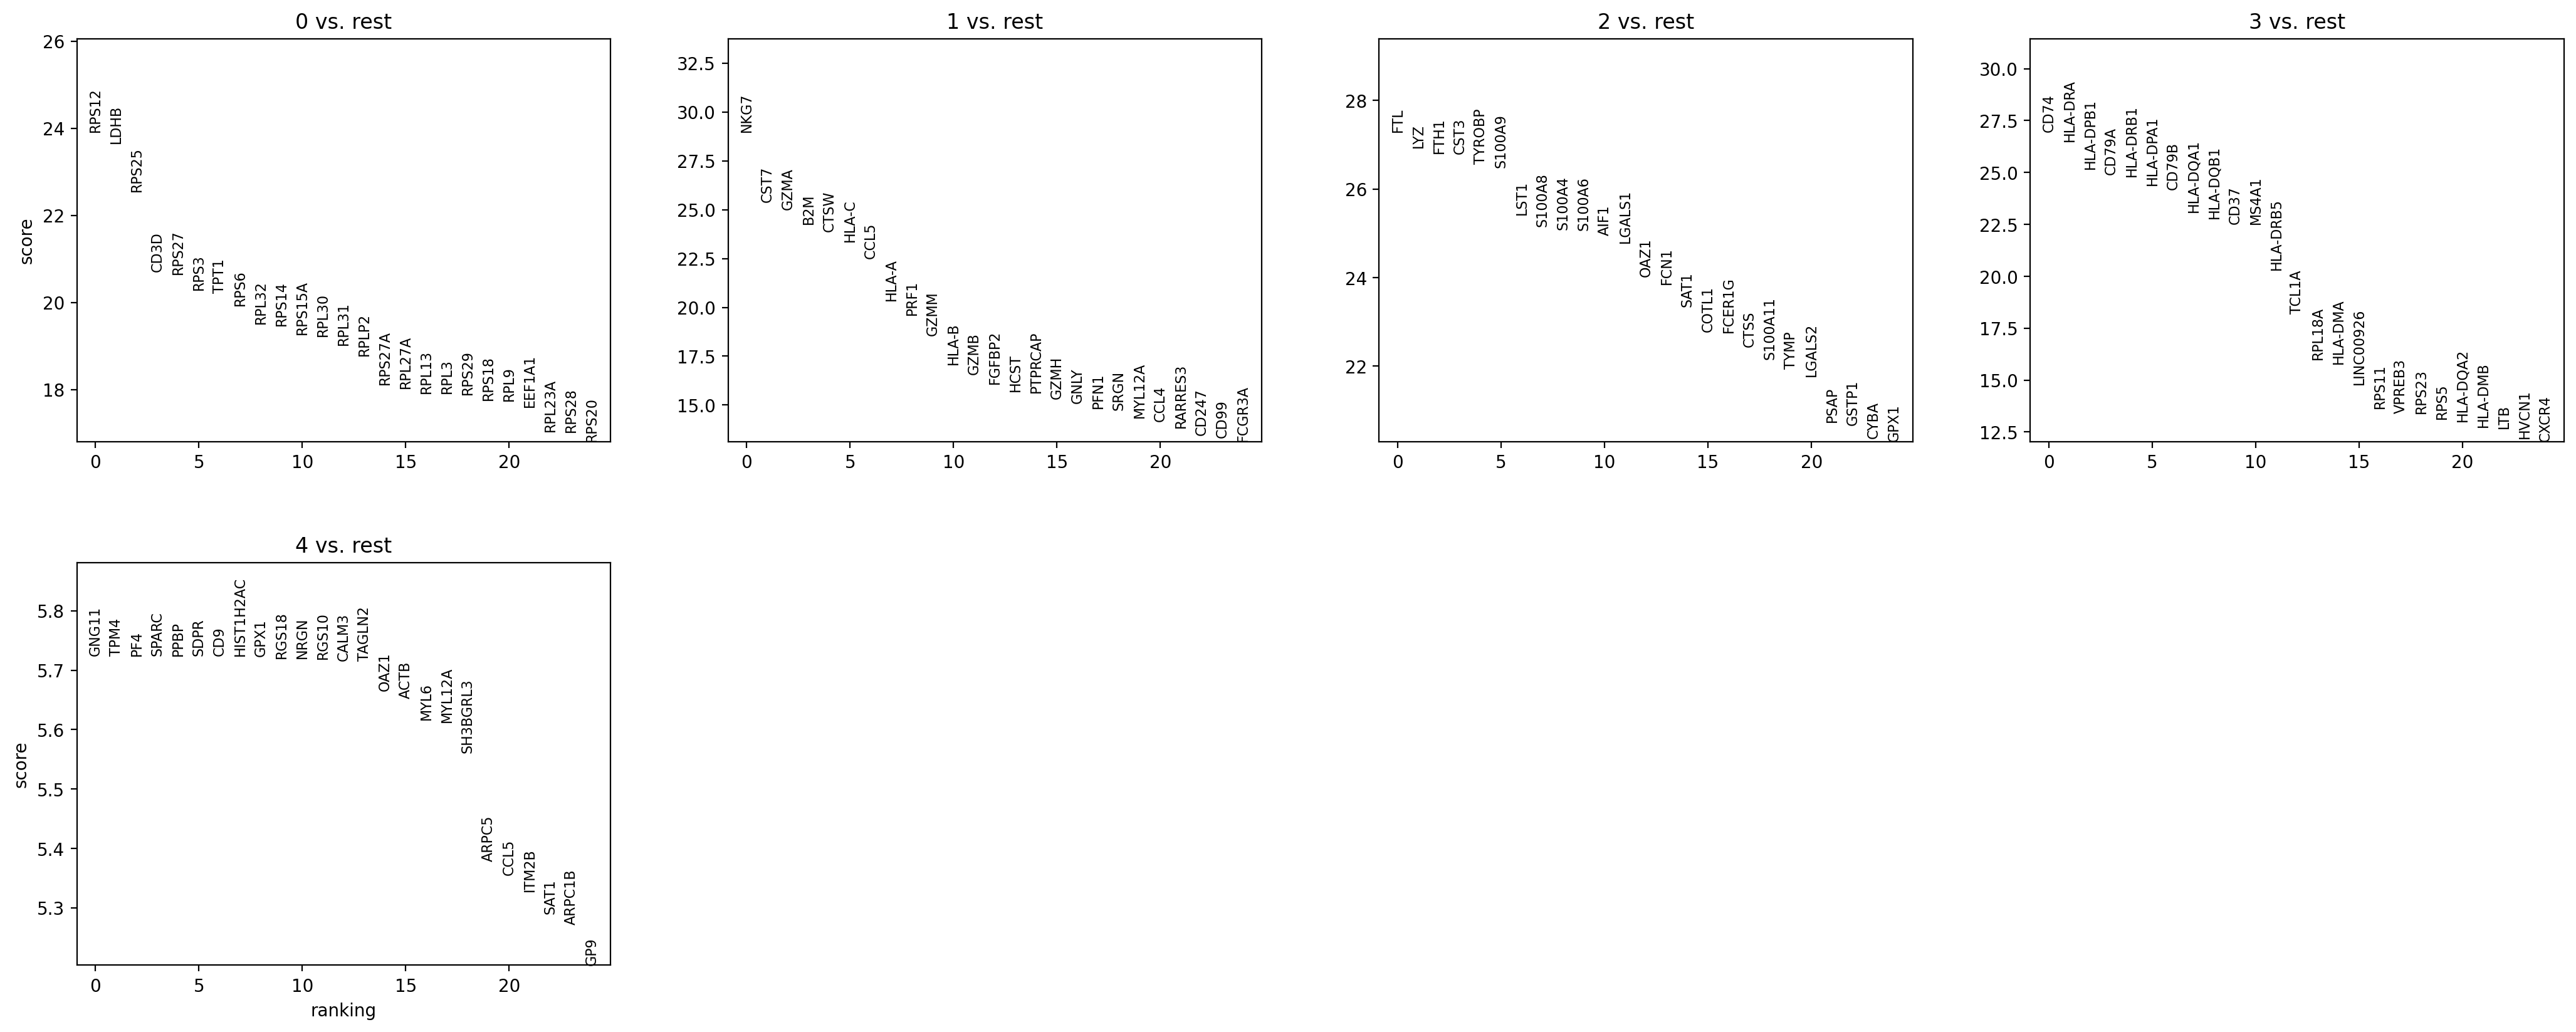


Nombre de cellules par cluster :
leiden
0    777
1    375
2    301
3    294
4     11
Name: count, dtype: int64


In [33]:
# Calcul du graphe de voisinage
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Clustering avec l'algorithme de Leiden
sc.tl.leiden(adata, resolution=0.5)

# Calcul de l'embedding t-SNE
sc.tl.tsne(adata, n_pcs=40)

# Calcul de l'embedding UMAP
sc.tl.umap(adata)

# Visualisation des résultats
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# t-SNE plot
sc.pl.tsne(adata, color='leiden', title='t-SNE colored by cluster', ax=axs[0], show=False)

# UMAP plot
sc.pl.umap(adata, color='leiden', title='UMAP colored by cluster', ax=axs[1], show=False)

plt.tight_layout()

# Analyse des marqueurs de chaque cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

# Visualiser les gènes marqueurs pour chaque cluster
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# Afficher les statistiques des clusters
print("\nNombre de cellules par cluster :")
print(adata.obs['leiden'].value_counts().sort_index())

## 6. Annotation des Clusters

Dans cette étape, nous allons :
1. Identifier les gènes marqueurs spécifiques à chaque cluster
2. Annoter les clusters en fonction des gènes marqueurs connus
3. Visualiser l'expression des gènes marqueurs sur les cartes t-SNE et UMAP


Visualisation des gènes marqueurs pour B cells:


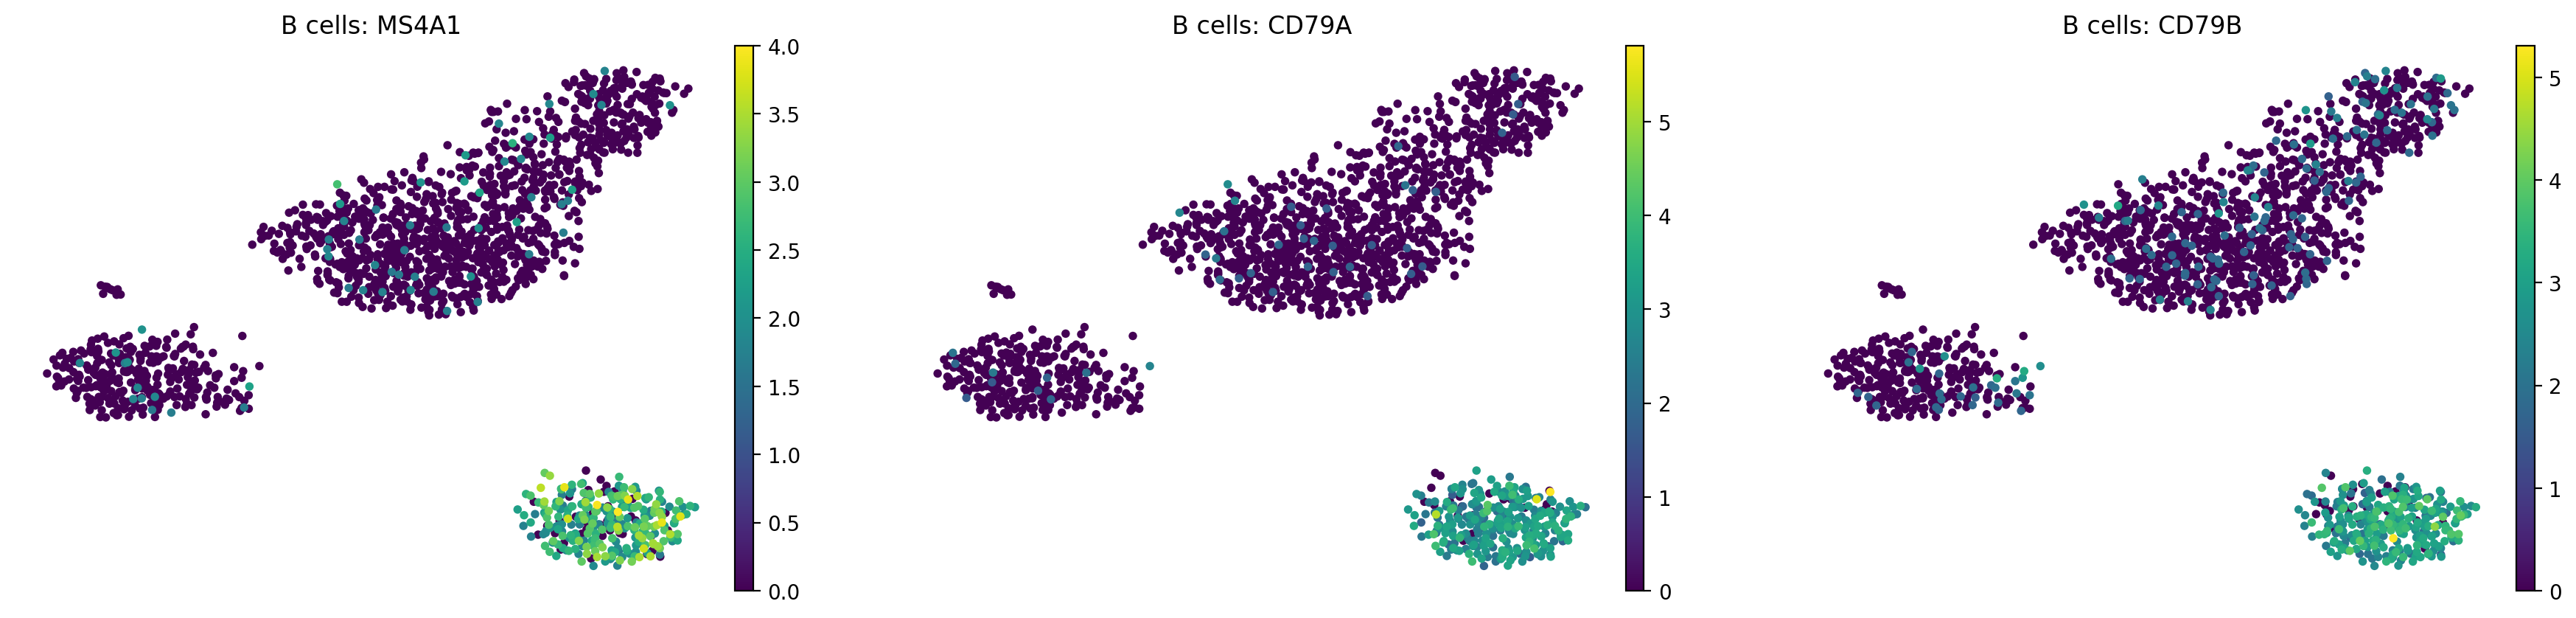


Visualisation des gènes marqueurs pour T cells:


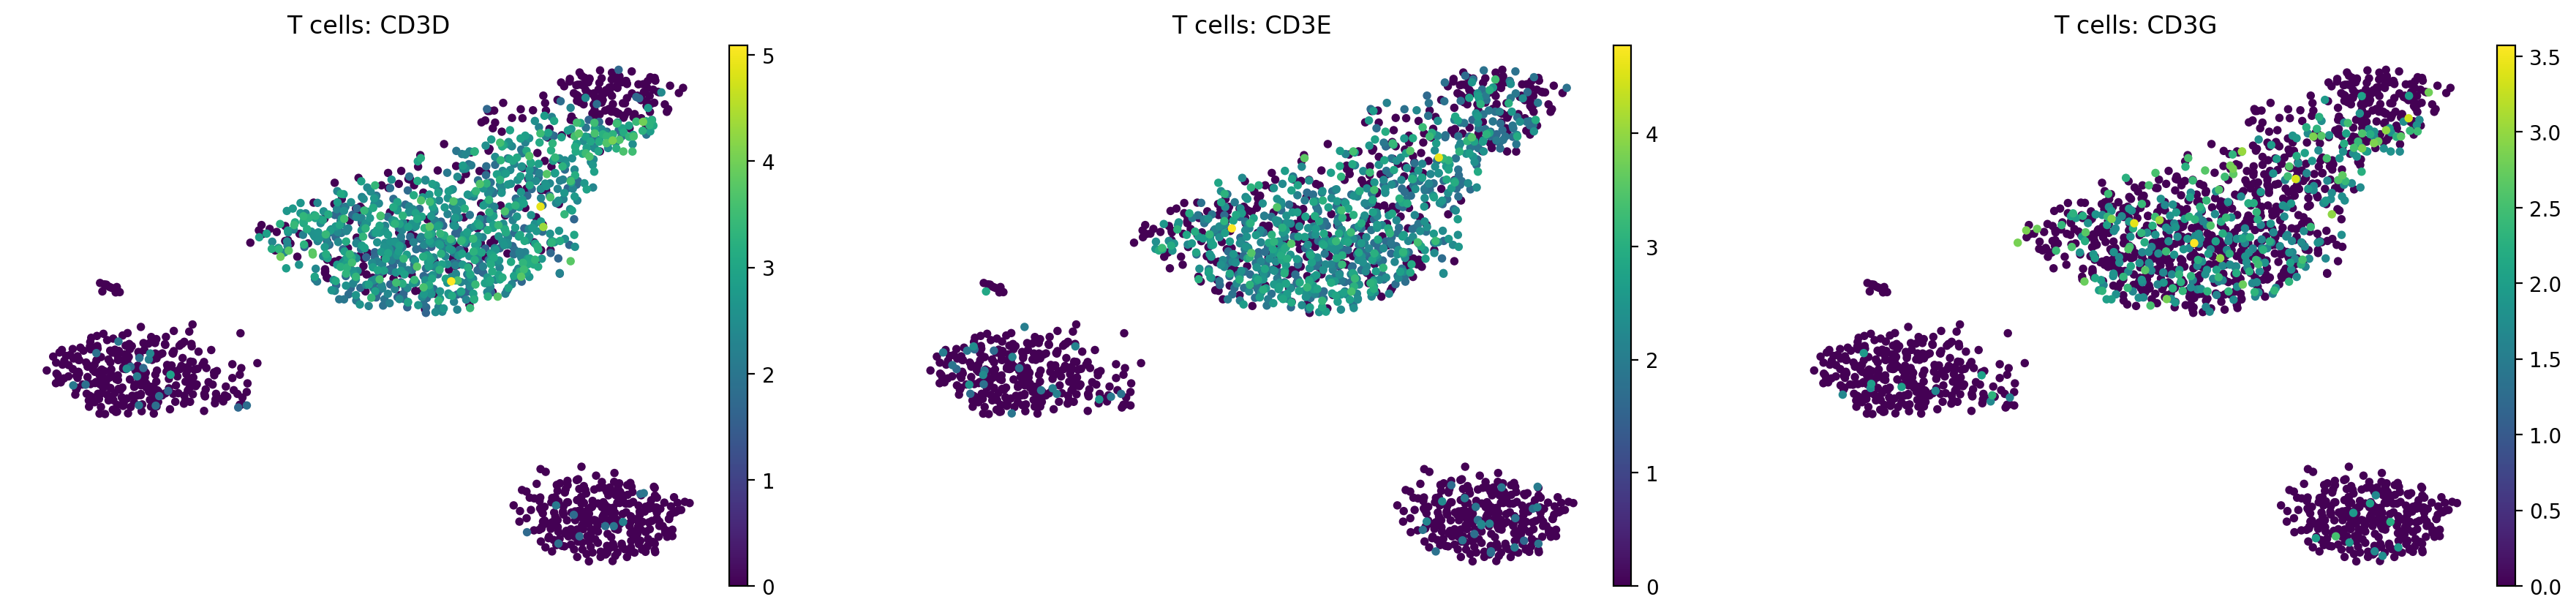


Visualisation des gènes marqueurs pour NK cells:


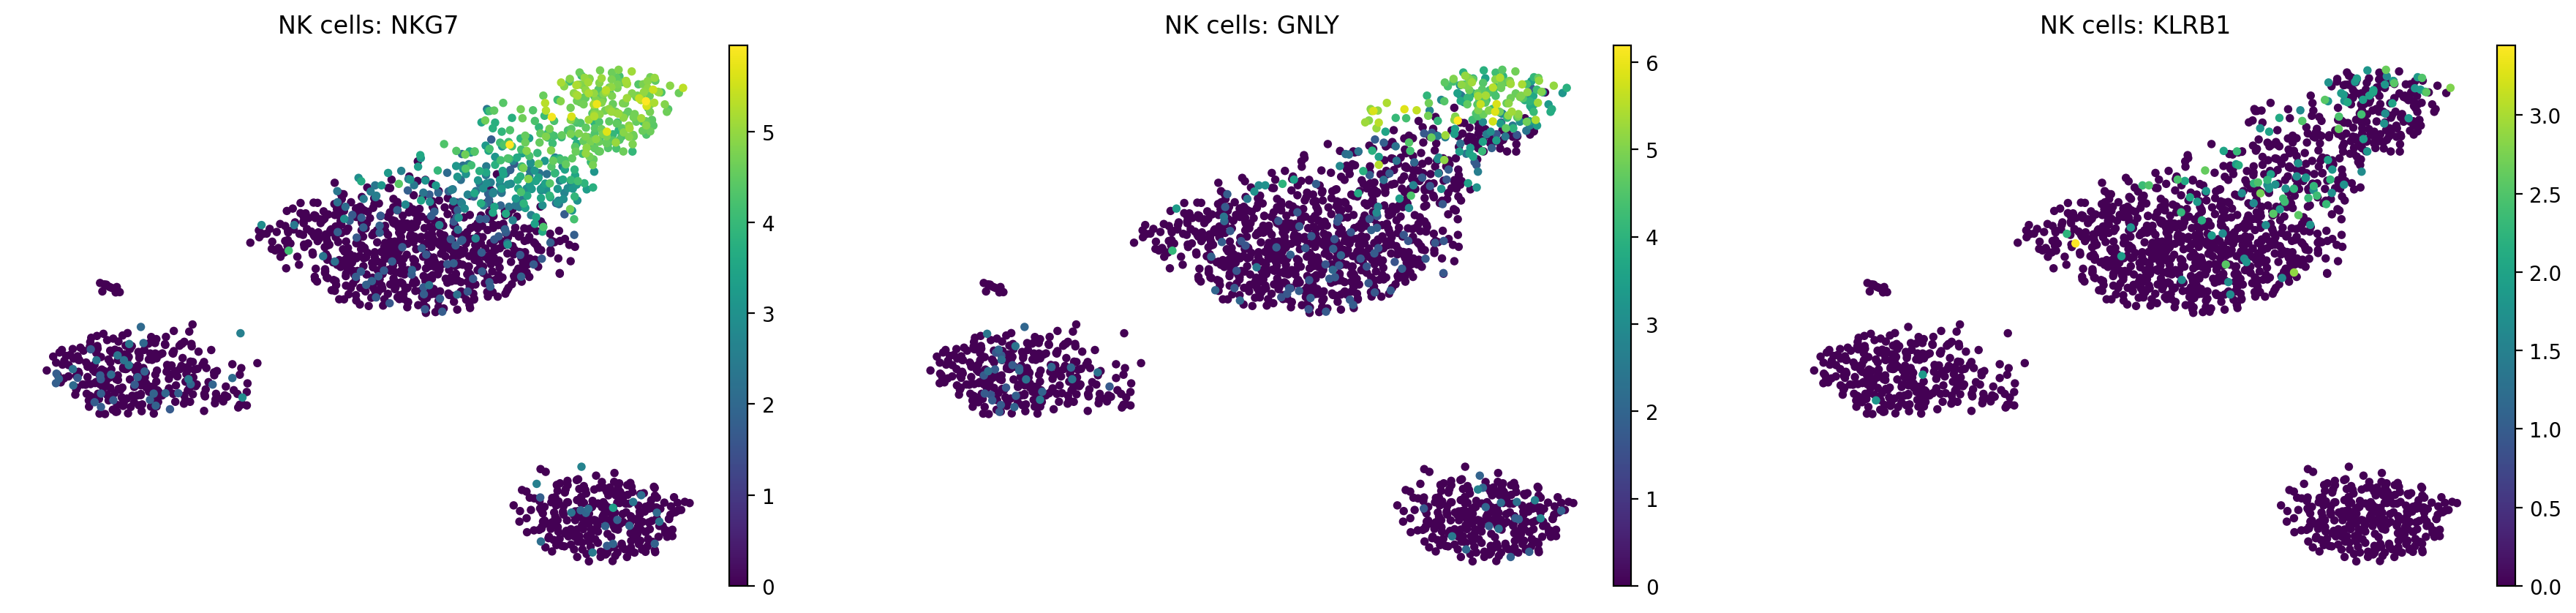


Visualisation des gènes marqueurs pour Monocytes:


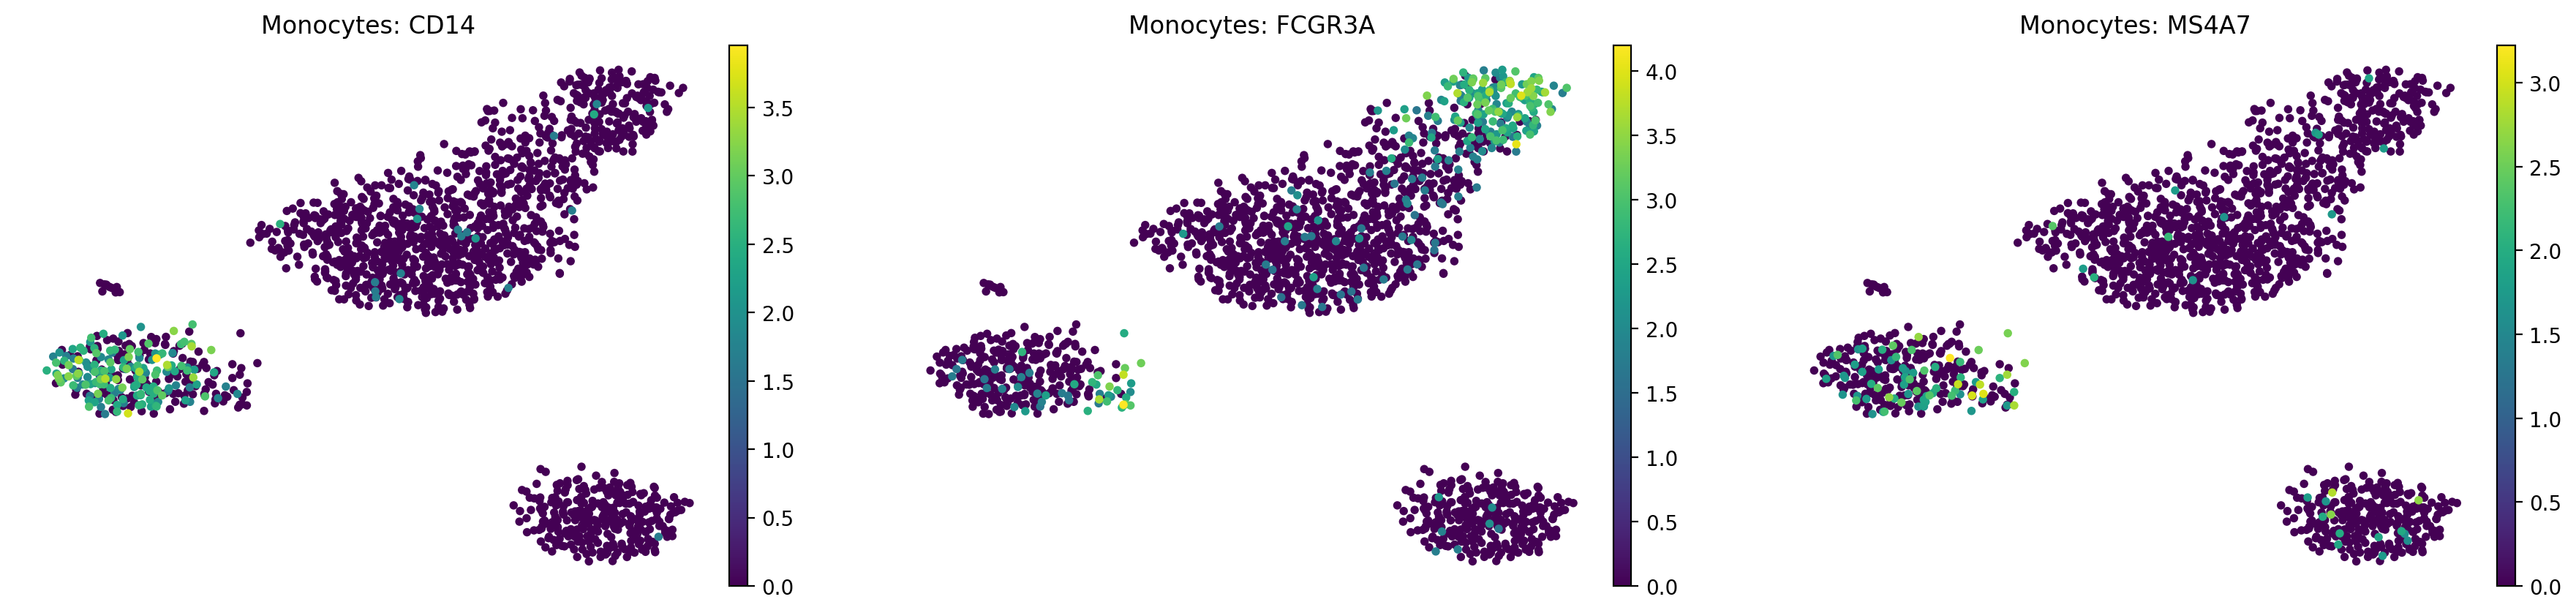


Visualisation des gènes marqueurs pour Dendritic cells:


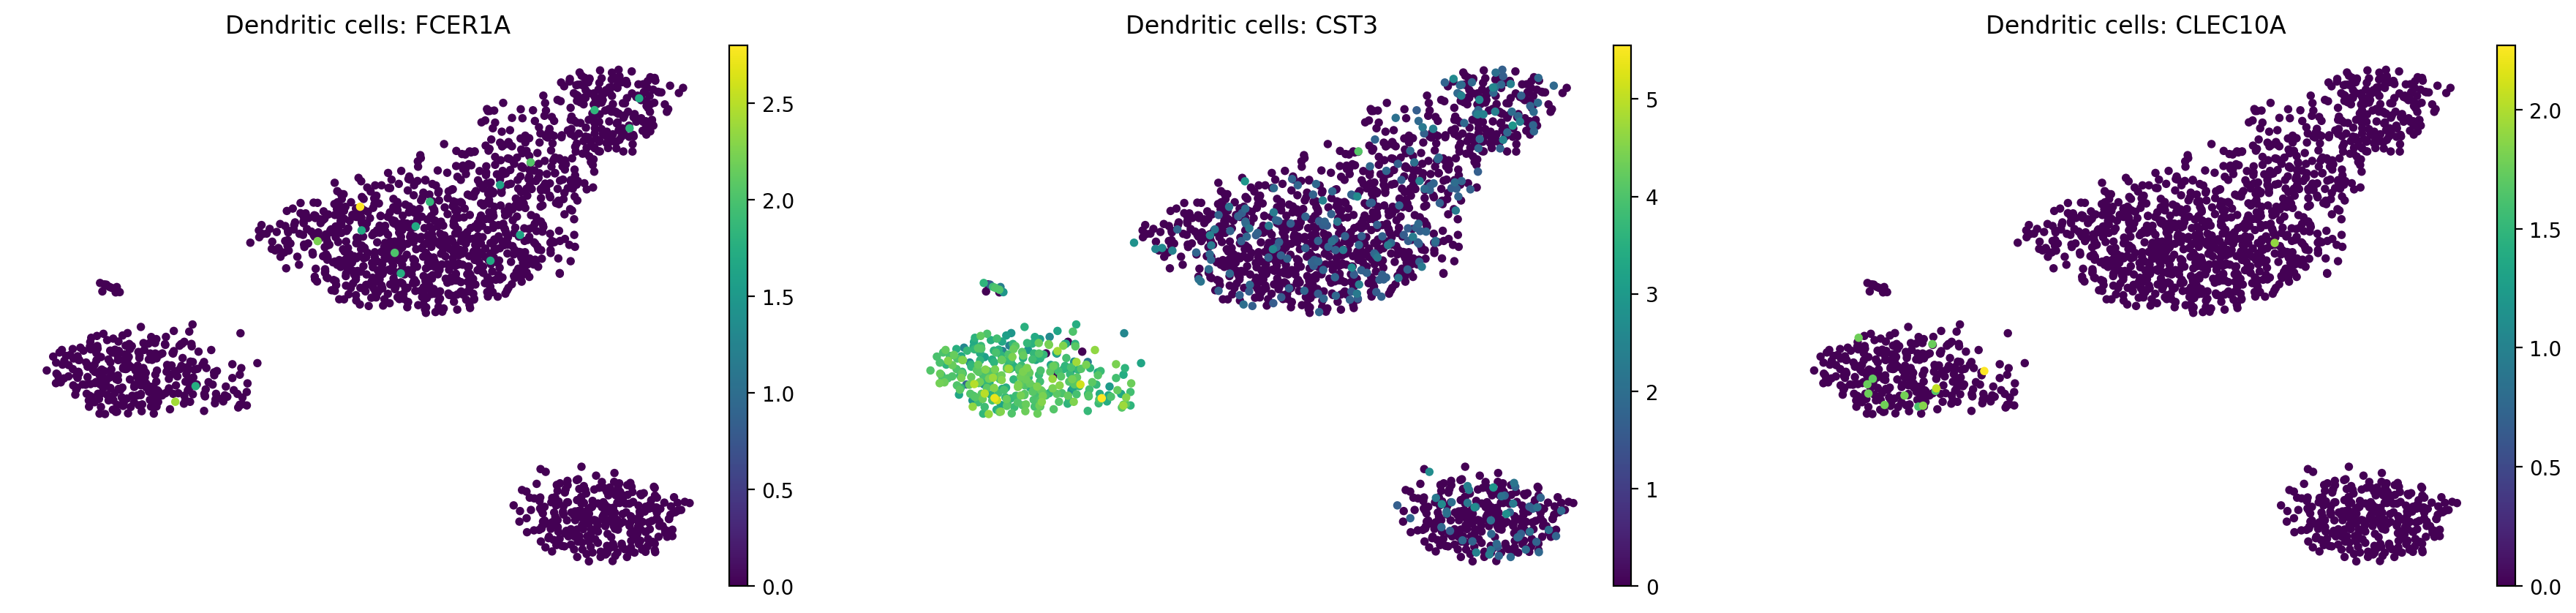


Visualisation des gènes marqueurs pour Platelets:


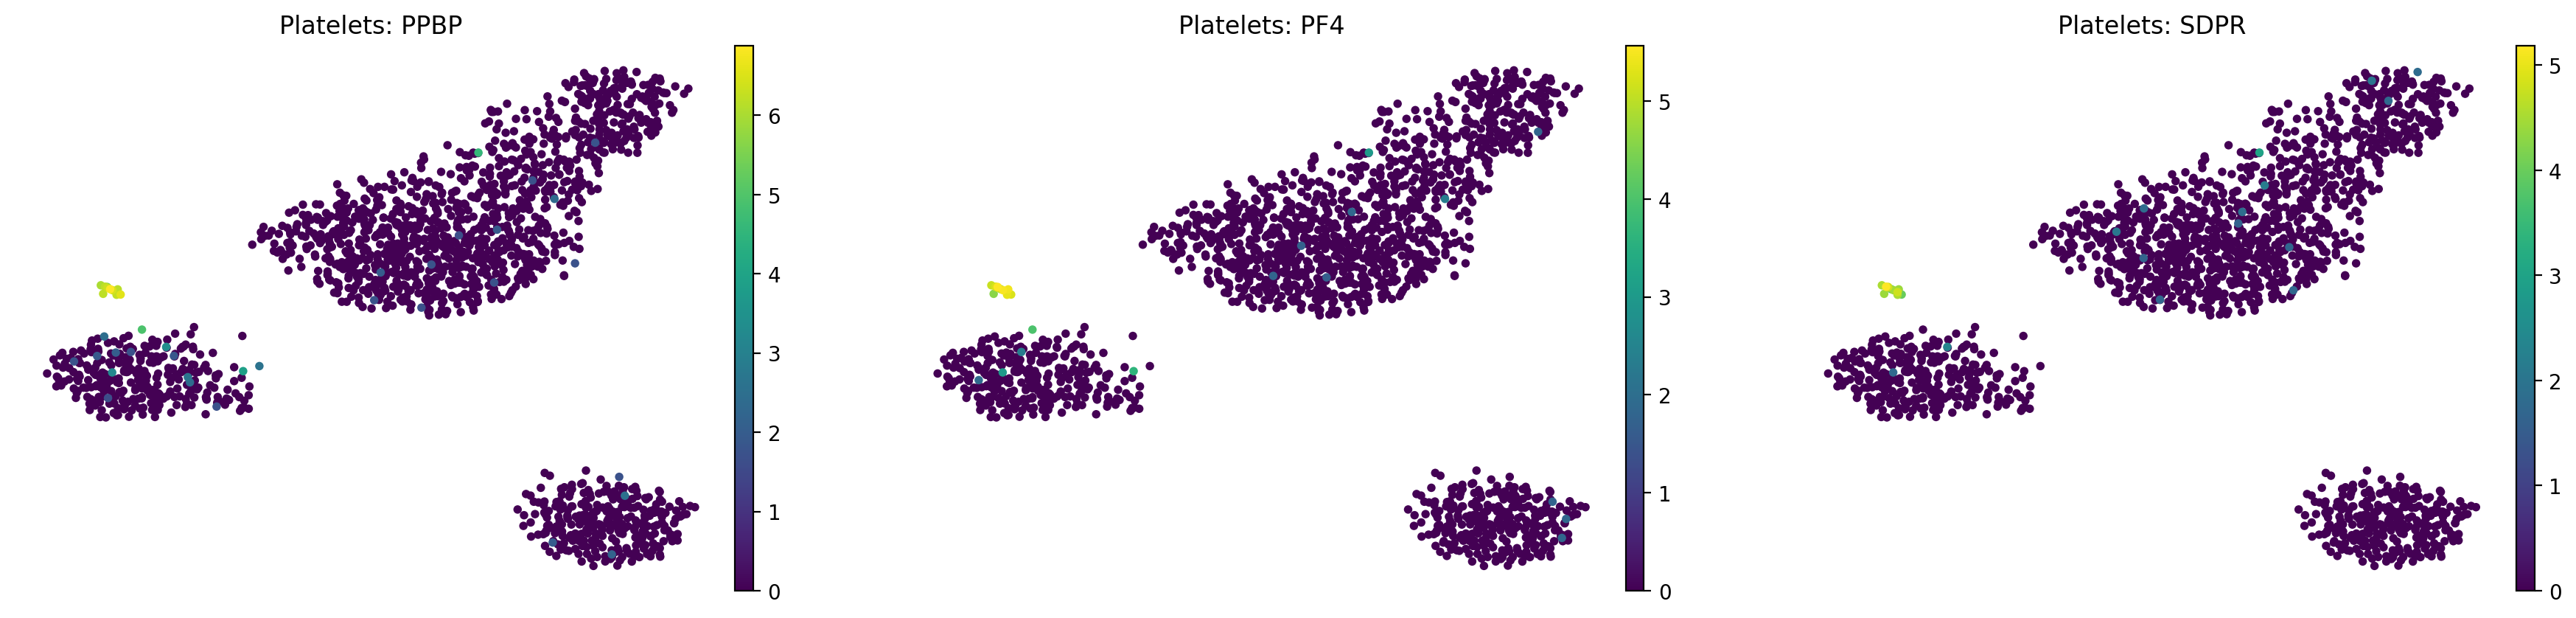


Top 5 gènes marqueurs pour chaque cluster :
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/nguyeho3/miniforge3/envs/sc-rnaseq/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:449: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin, ymax)


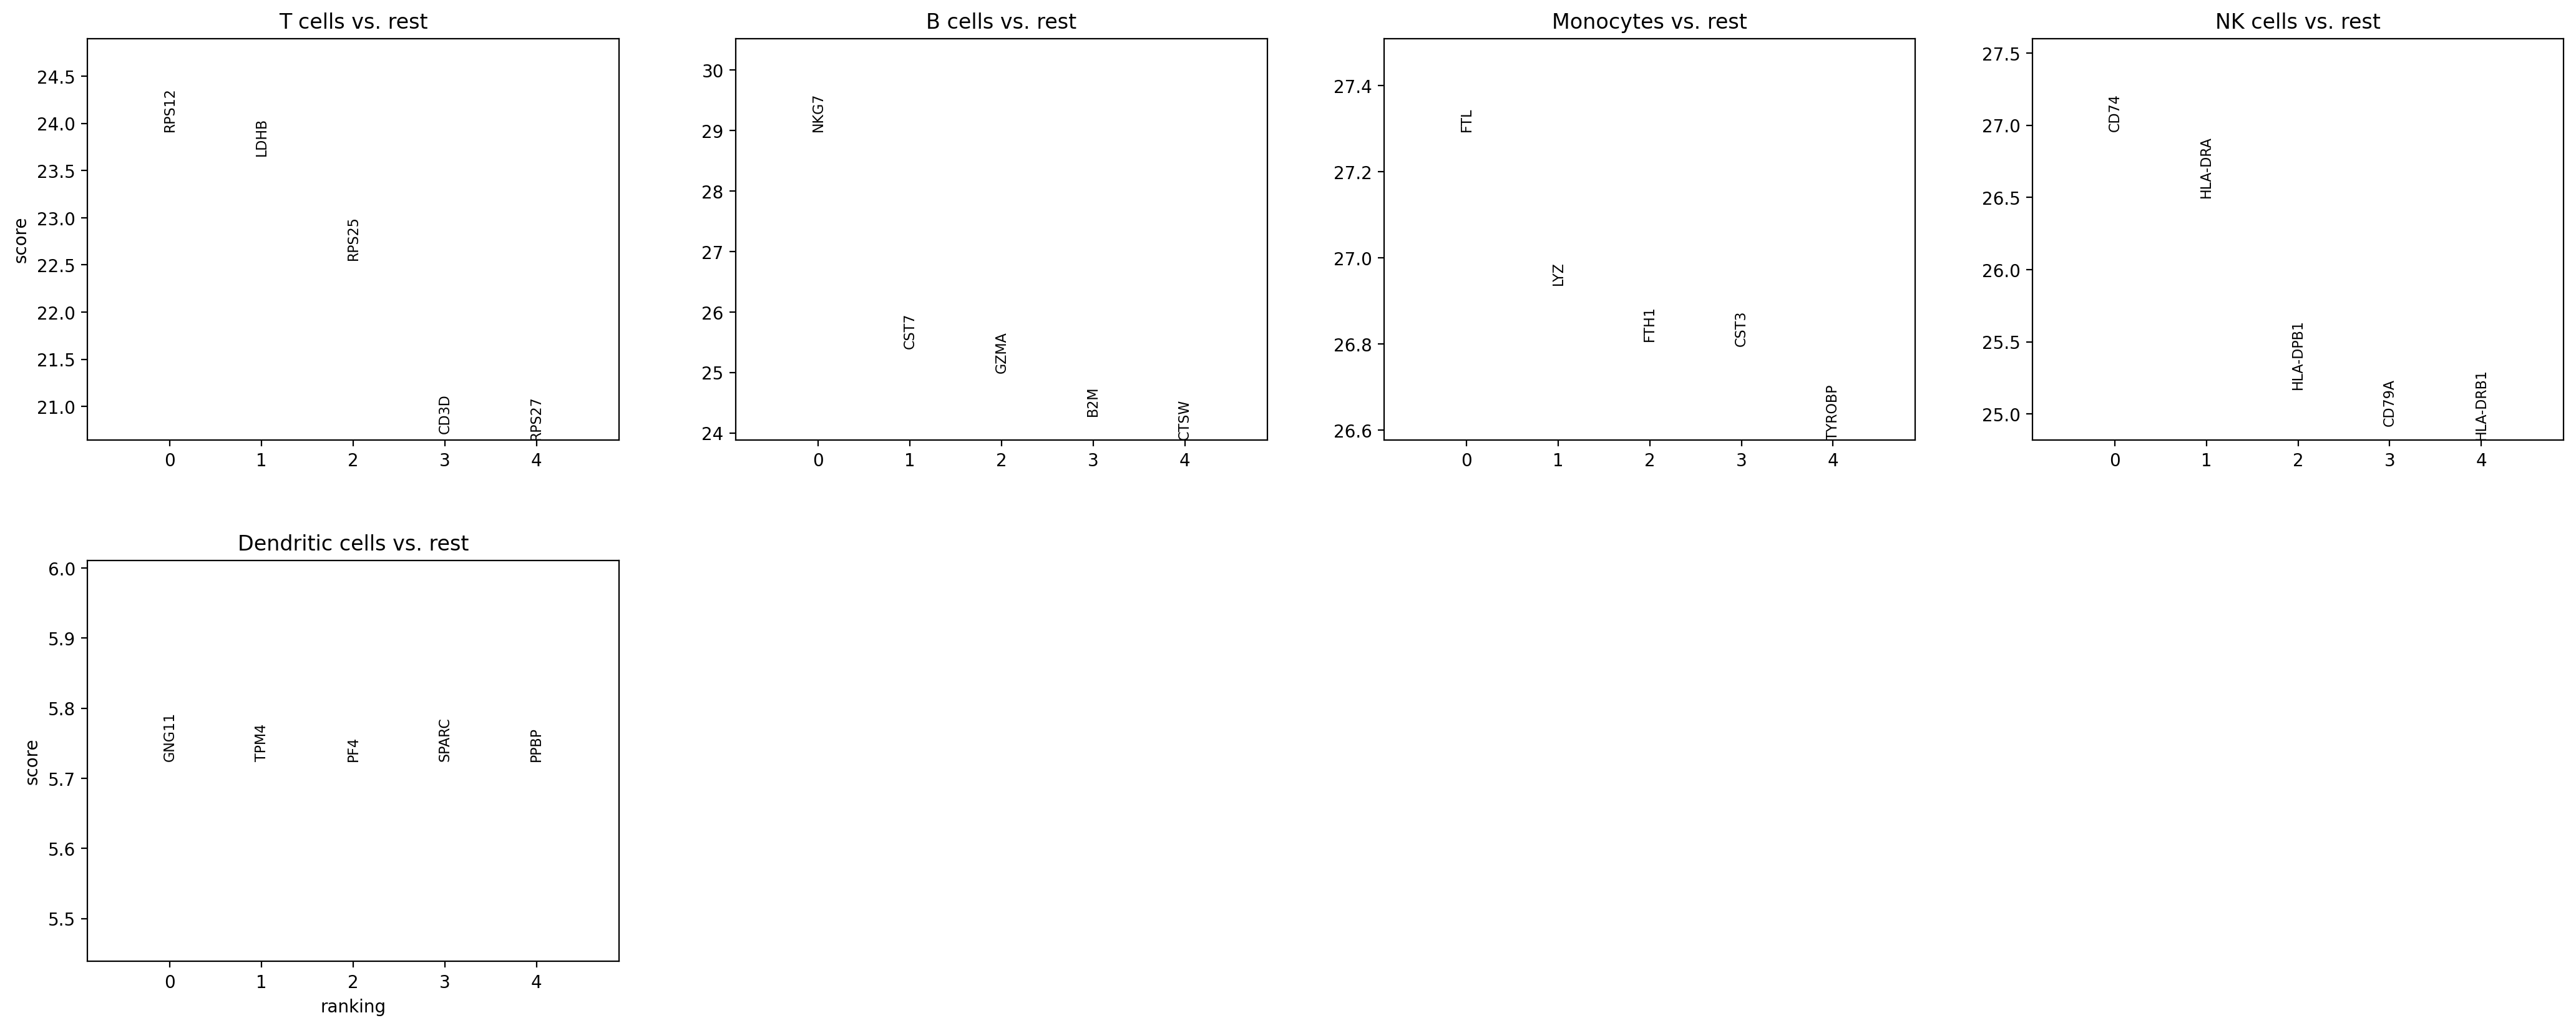


Distribution des types cellulaires :
cell_type
T cells            777
B cells            375
Monocytes          301
NK cells           294
Dendritic cells     11
Name: count, dtype: int64


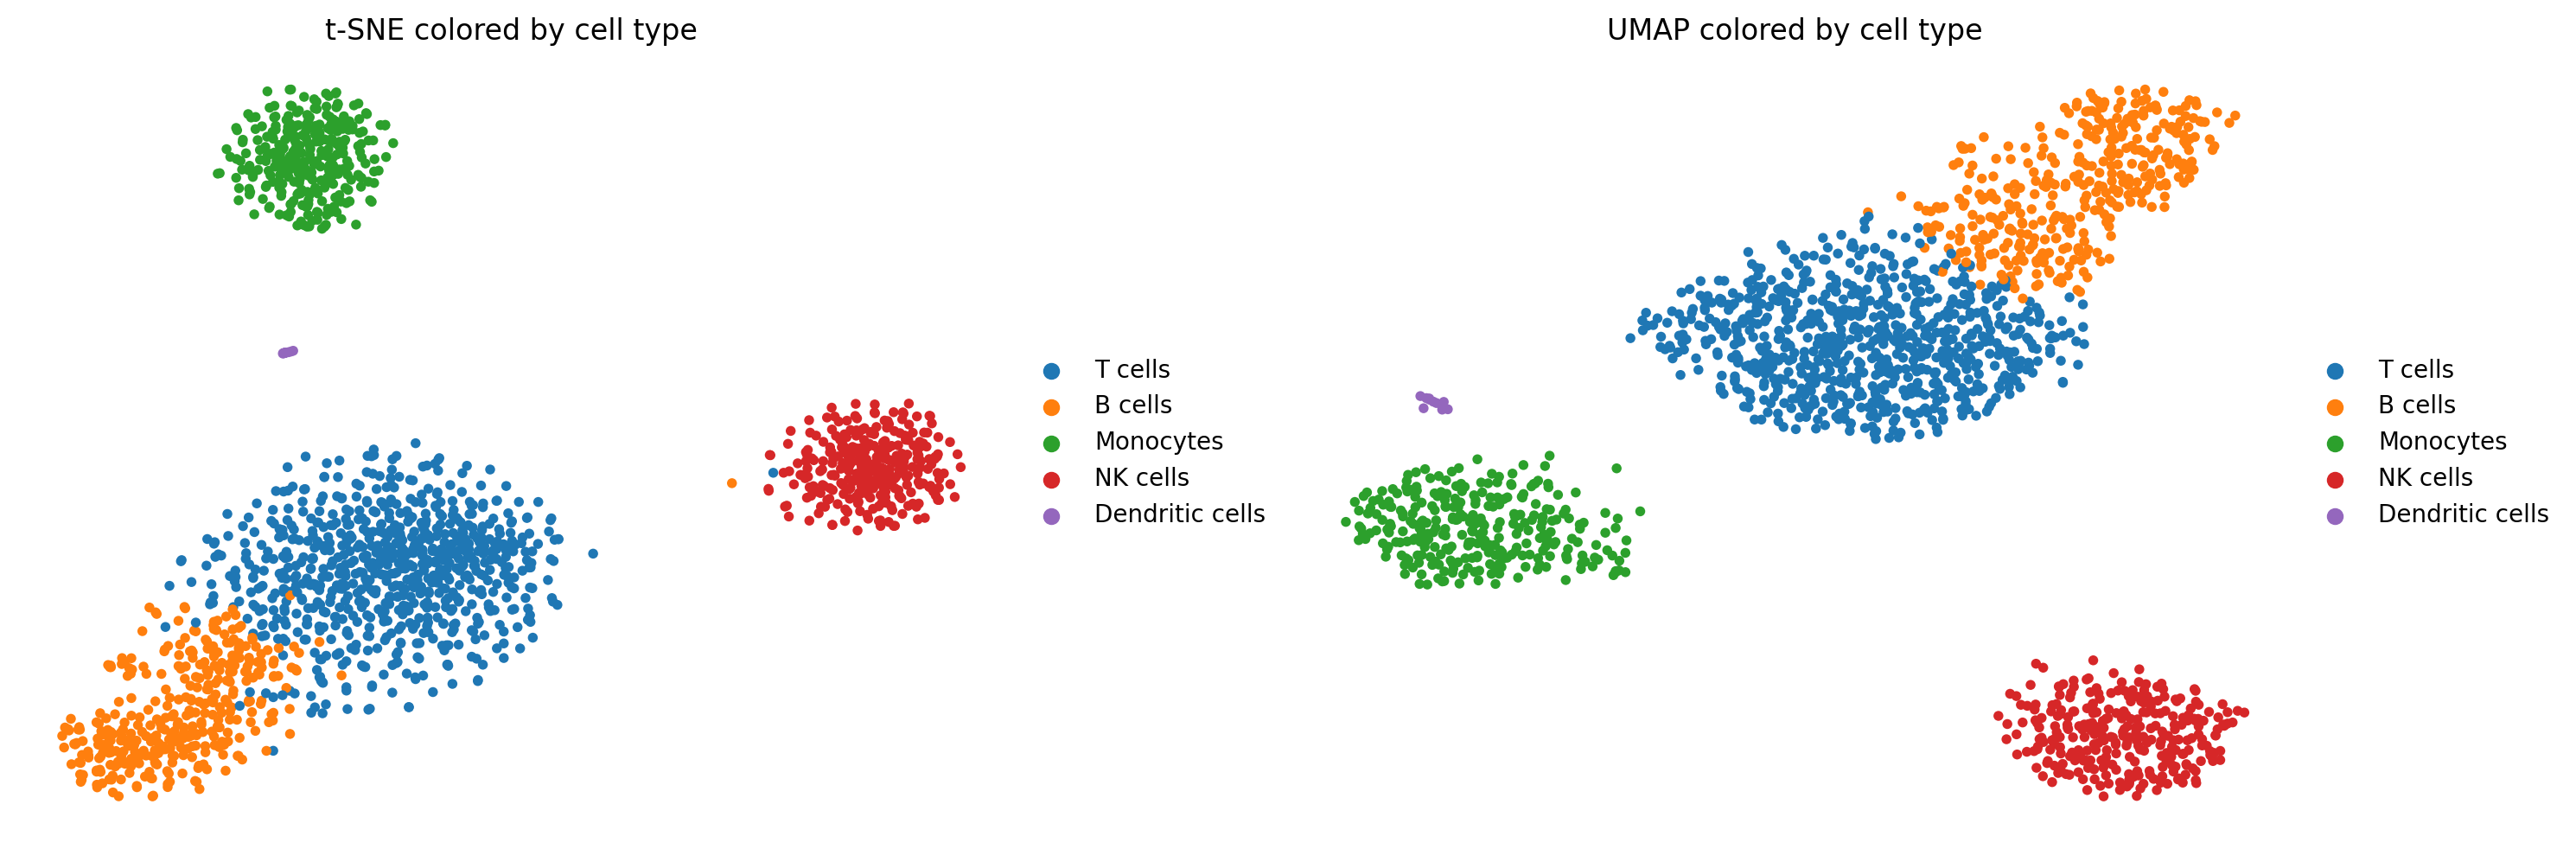

In [34]:
# Définir les gènes marqueurs connus pour les cellules immunitaires
marker_genes = {
    'B cells': ['MS4A1', 'CD79A', 'CD79B'],
    'T cells': ['CD3D', 'CD3E', 'CD3G'],
    'NK cells': ['NKG7', 'GNLY', 'KLRB1'],
    'Monocytes': ['CD14', 'FCGR3A', 'MS4A7'],
    'Dendritic cells': ['FCER1A', 'CST3', 'CLEC10A'],
    'Platelets': ['PPBP', 'PF4', 'SDPR']
}

# Créer un dictionnaire pour annoter les clusters
cluster_annotations = {
    '0': 'T cells',
    '1': 'B cells',
    '2': 'Monocytes',
    '3': 'NK cells',
    '4': 'Dendritic cells',
    '5': 'Platelets'
}

# Ajouter les annotations aux métadonnées
adata.obs['cell_type'] = adata.obs['leiden'].map(cluster_annotations)

# Créer une figure pour chaque type de cellule
for cell_type, genes in marker_genes.items():
    print(f"\nVisualisation des gènes marqueurs pour {cell_type}:")
    # Créer une liste de titres pour chaque gène
    titles = [f"{cell_type}: {gene}" for gene in genes]
    sc.pl.umap(adata, color=genes, ncols=3, title=titles)

# Afficher les gènes marqueurs les plus significatifs pour chaque cluster
print("\nTop 5 gènes marqueurs pour chaque cluster :")
# Modifier les labels des clusters pour utiliser les annotations
adata.obs['leiden_annotated'] = adata.obs['leiden'].map(cluster_annotations)
sc.tl.rank_genes_groups(adata, 'leiden_annotated', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

# Visualiser les clusters annotés
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# t-SNE plot avec annotations
sc.pl.tsne(adata, color='cell_type', title='t-SNE colored by cell type', ax=axs[0], show=False)

# UMAP plot avec annotations
sc.pl.umap(adata, color='cell_type', title='UMAP colored by cell type', ax=axs[1], show=False)

plt.tight_layout()

# Afficher la distribution des types cellulaires
print("\nDistribution des types cellulaires :")
print(adata.obs['cell_type'].value_counts())

Analyse des gènes marqueurs par type de cellule

In [35]:
# Créer un DataFrame avec les résultats des gènes marqueurs
marker_genes_df = pd.DataFrame()
for cell_type in adata.obs['cell_type'].unique():
    # Extraire les gènes marqueurs pour ce type de cellule
    markers = sc.get.rank_genes_groups_df(adata, group=cell_type)
    markers['cell_type'] = cell_type
    marker_genes_df = pd.concat([marker_genes_df, markers])

# Afficher les top 10 gènes marqueurs pour chaque type de cellule
print("\nTop 10 gènes marqueurs par type de cellule :")
for cell_type in adata.obs['cell_type'].unique():
    print(f"\n{cell_type}:")
    print(marker_genes_df[marker_genes_df['cell_type'] == cell_type].head(10)[['names', 'scores', 'pvals_adj']])


Top 10 gènes marqueurs par type de cellule :

T cells:
   names     scores      pvals_adj
0  RPS12  23.916824  2.537674e-122
1   LDHB  23.655857  6.368185e-120
2  RPS25  22.555746  4.873423e-109
3   CD3D  20.713461   4.638971e-92
4  RPS27  20.644732   1.687023e-91
5   RPS3  20.286322   2.339423e-88
6   TPT1  20.217922   8.441279e-88
7   RPS6  19.924601   2.572657e-85
8  RPL32  19.517422   6.914010e-82
9  RPS14  19.474470   1.400720e-81

B cells:
   names     scores      pvals_adj
0   NKG7  28.986080  1.221768e-180
1   CST7  25.394518  1.797065e-138
2   GZMA  24.995335  2.839261e-134
3    B2M  24.280119  9.855144e-127
4   CTSW  23.886497  1.049075e-122
5  HLA-C  23.378702  1.454440e-117
6   CCL5  22.511978  5.610742e-109
7  HLA-A  20.367420   5.041997e-89
8   PRF1  19.608679   1.795811e-82
9   GZMM  18.568085   7.220541e-74

Monocytes:
    names     scores      pvals_adj
0     FTL  27.293703  6.245981e-160
1     LYZ  26.937120  5.004916e-156
2    FTH1  26.806288  1.126239e-154
3    CST

Analyse de la distribution des cellules :


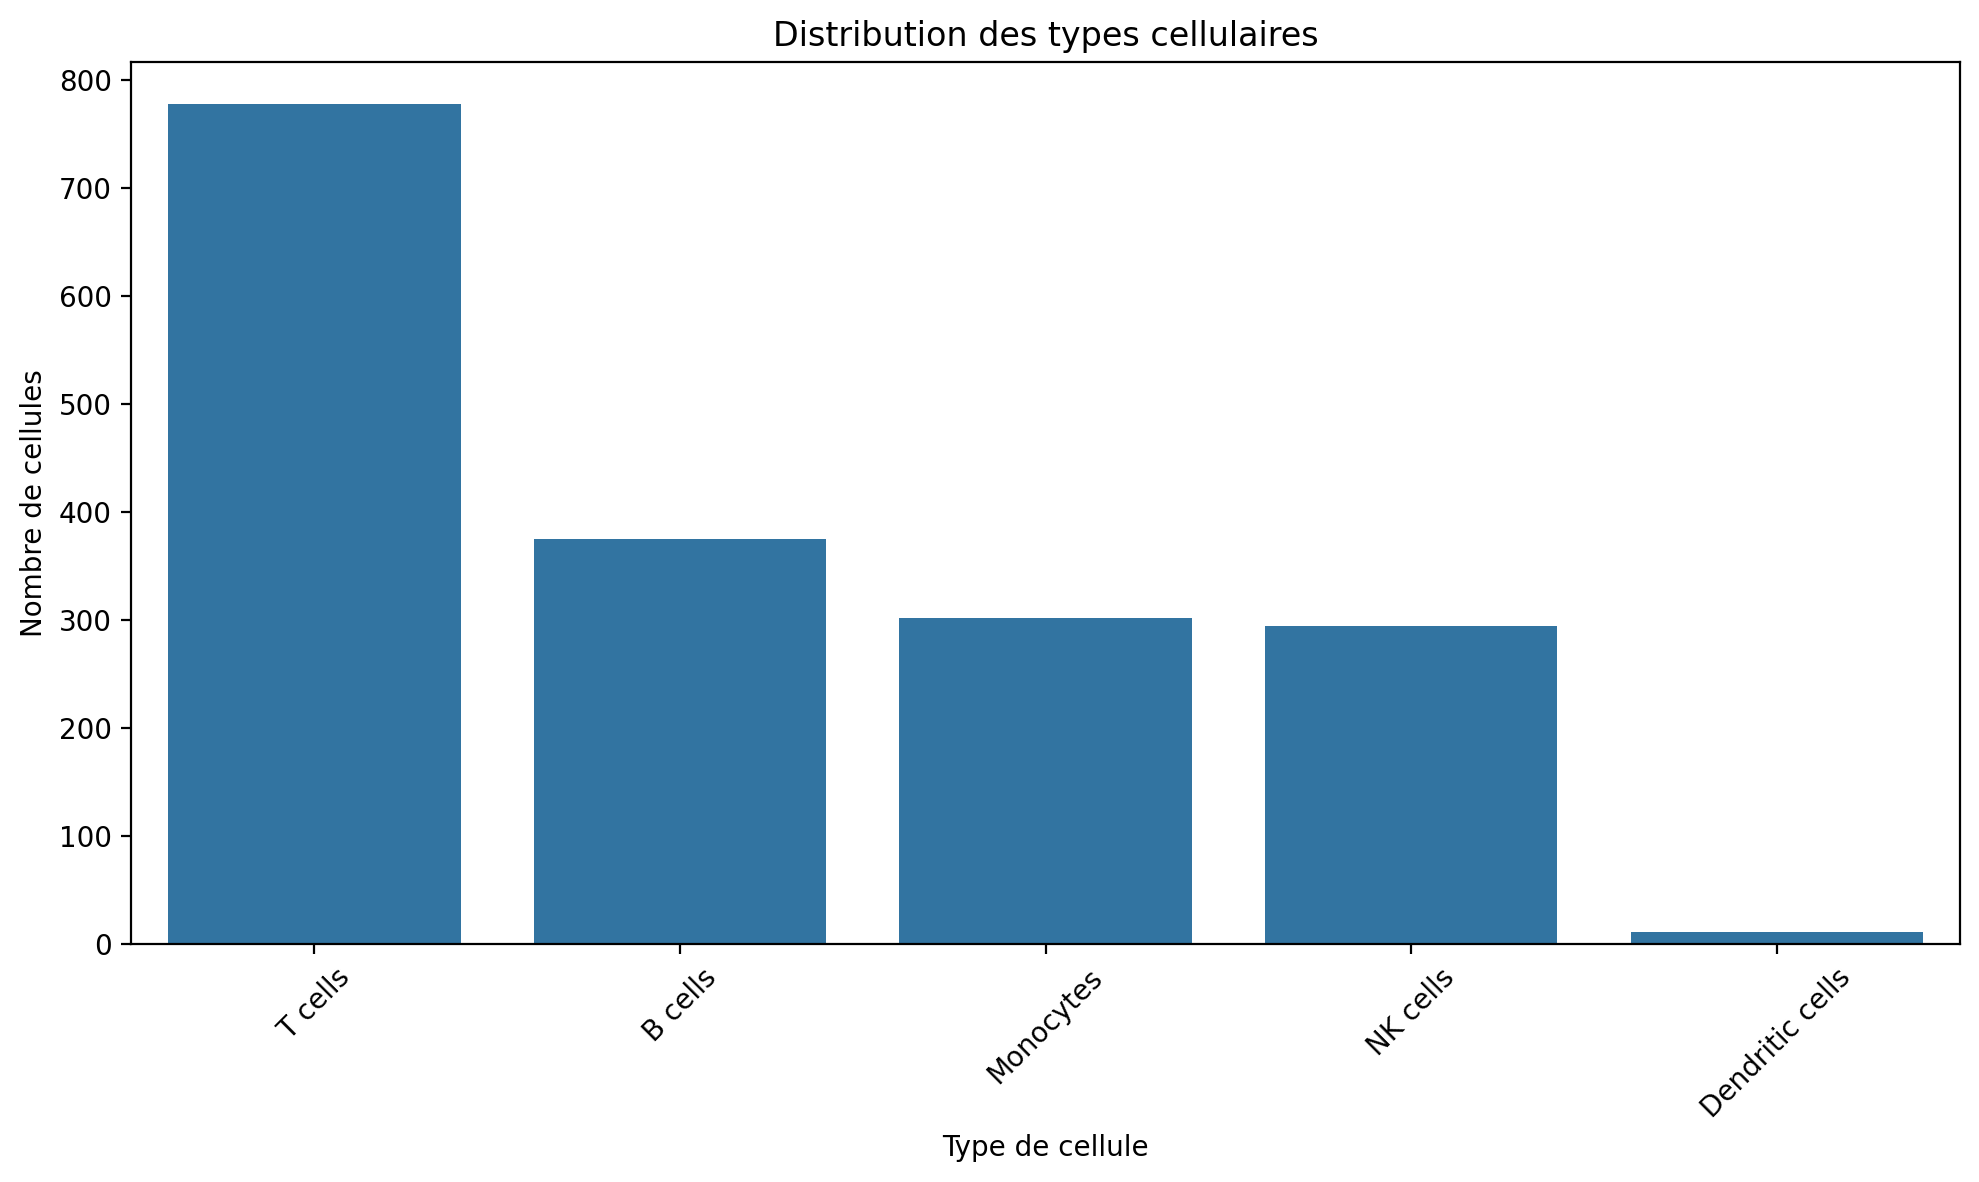

In [36]:
# Créer un graphique de la distribution des cellules
plt.figure(figsize=(10, 6))
cell_counts = adata.obs['cell_type'].value_counts()
sns.barplot(x=cell_counts.index, y=cell_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution des types cellulaires')
plt.xlabel('Type de cellule')
plt.ylabel('Nombre de cellules')
plt.tight_layout()

Analyse des relations entre les clusters :


/tmp/ipykernel_496709/3215106353.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_matrix = cell_type_means.groupby(level=0).mean().T.corr()



Statistiques de corrélation entre les types de cellules :
cell_type   T cells   B cells  Monocytes  NK cells  Dendritic cells
count      5.000000  5.000000   5.000000  5.000000         5.000000
mean       0.001767  0.000142  -0.037254  0.015636         0.144725
std        0.593046  0.576172   0.620612  0.561162         0.481485
min       -0.581279 -0.392921  -0.581279 -0.384626        -0.133113
25%       -0.229495 -0.384626  -0.392921 -0.234135        -0.091762
50%       -0.091762 -0.133113  -0.234135 -0.229495        -0.073565
75%       -0.088631 -0.088631   0.022064 -0.073565         0.022064
max        1.000000  1.000000   1.000000  1.000000         1.000000

Paires de types de cellules les plus similaires :
       type1            type2  correlation
8  Monocytes  Dendritic cells     0.022064
9   NK cells  Dendritic cells    -0.073565
0    T cells          B cells    -0.088631
3    T cells  Dendritic cells    -0.091762
6    B cells  Dendritic cells    -0.133113


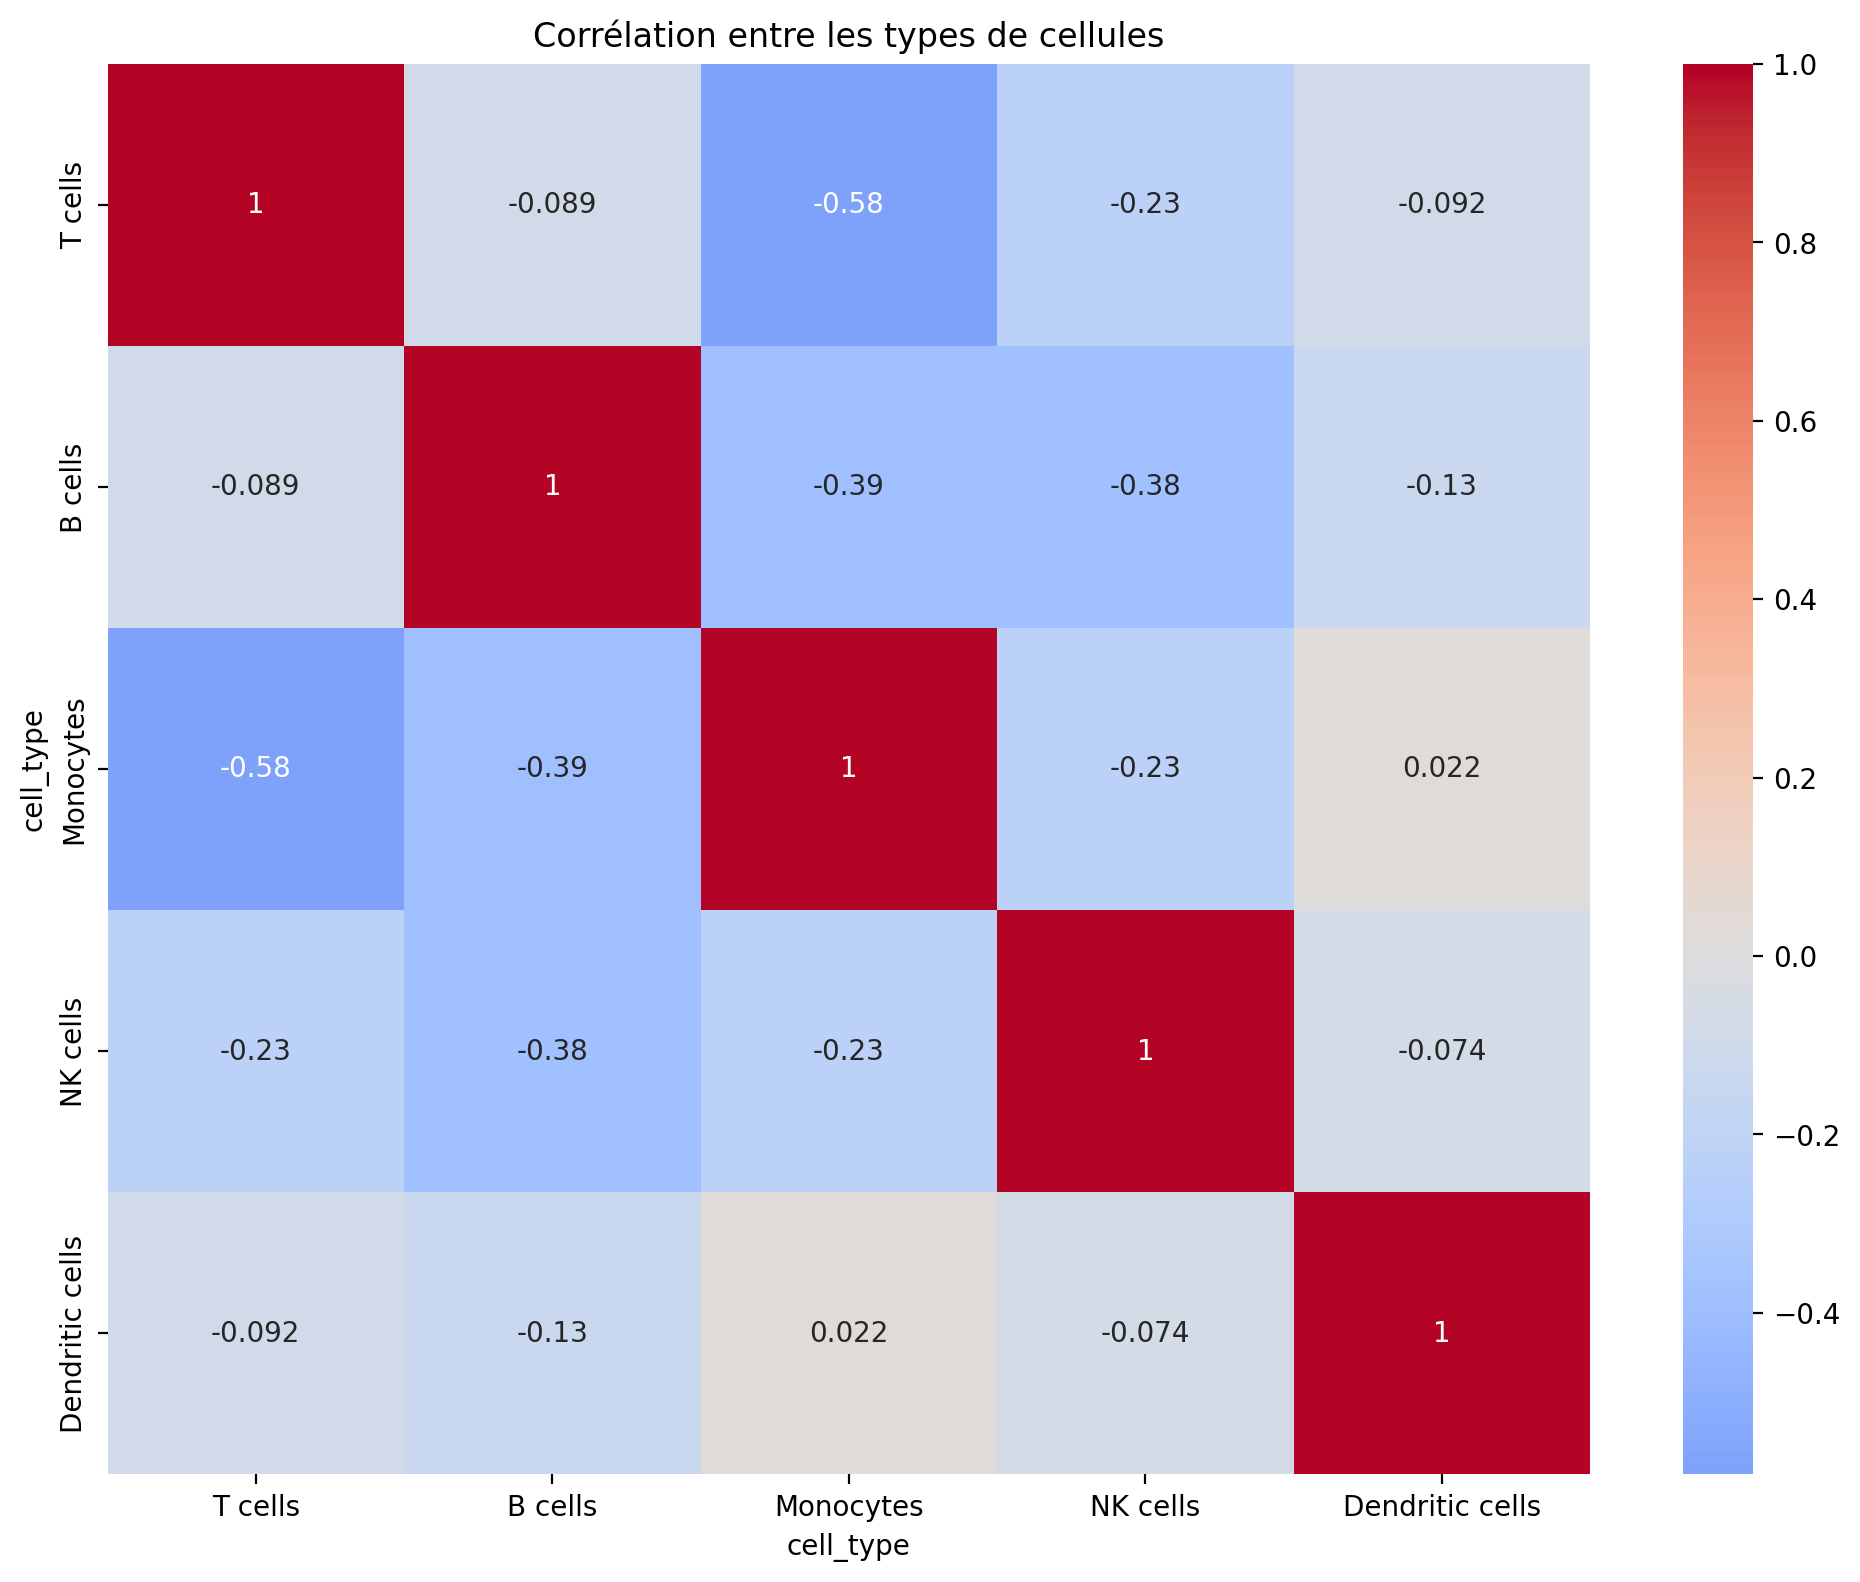

In [37]:
# Calculer la matrice de corrélation entre les types de cellules
cell_type_means = pd.DataFrame(adata.X, 
                             index=adata.obs['cell_type'],
                             columns=adata.var_names)
correlation_matrix = cell_type_means.groupby(level=0).mean().T.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélation entre les types de cellules')
plt.tight_layout()

# Afficher les statistiques de corrélation
print("\nStatistiques de corrélation entre les types de cellules :")
print(correlation_matrix.describe())

# Identifier les paires de types de cellules les plus similaires
print("\nPaires de types de cellules les plus similaires :")
# Convertir la matrice en une liste de paires
corr_pairs = []
for i in range(len(correlation_matrix.index)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'type1': correlation_matrix.index[i],
            'type2': correlation_matrix.columns[j],
            'correlation': correlation_matrix.iloc[i,j]
        })
# Créer un DataFrame et trier par corrélation
corr_df = pd.DataFrame(corr_pairs)
print(corr_df.sort_values('correlation', ascending=False).head())

Analyse des transitions entre les clusters :


Proportions des types de cellules dans chaque cluster :
cell_type  T cells  B cells  Monocytes  NK cells  Dendritic cells
leiden                                                           
0              1.0      0.0        0.0       0.0              0.0
1              0.0      1.0        0.0       0.0              0.0
2              0.0      0.0        1.0       0.0              0.0
3              0.0      0.0        0.0       1.0              0.0
4              0.0      0.0        0.0       0.0              1.0


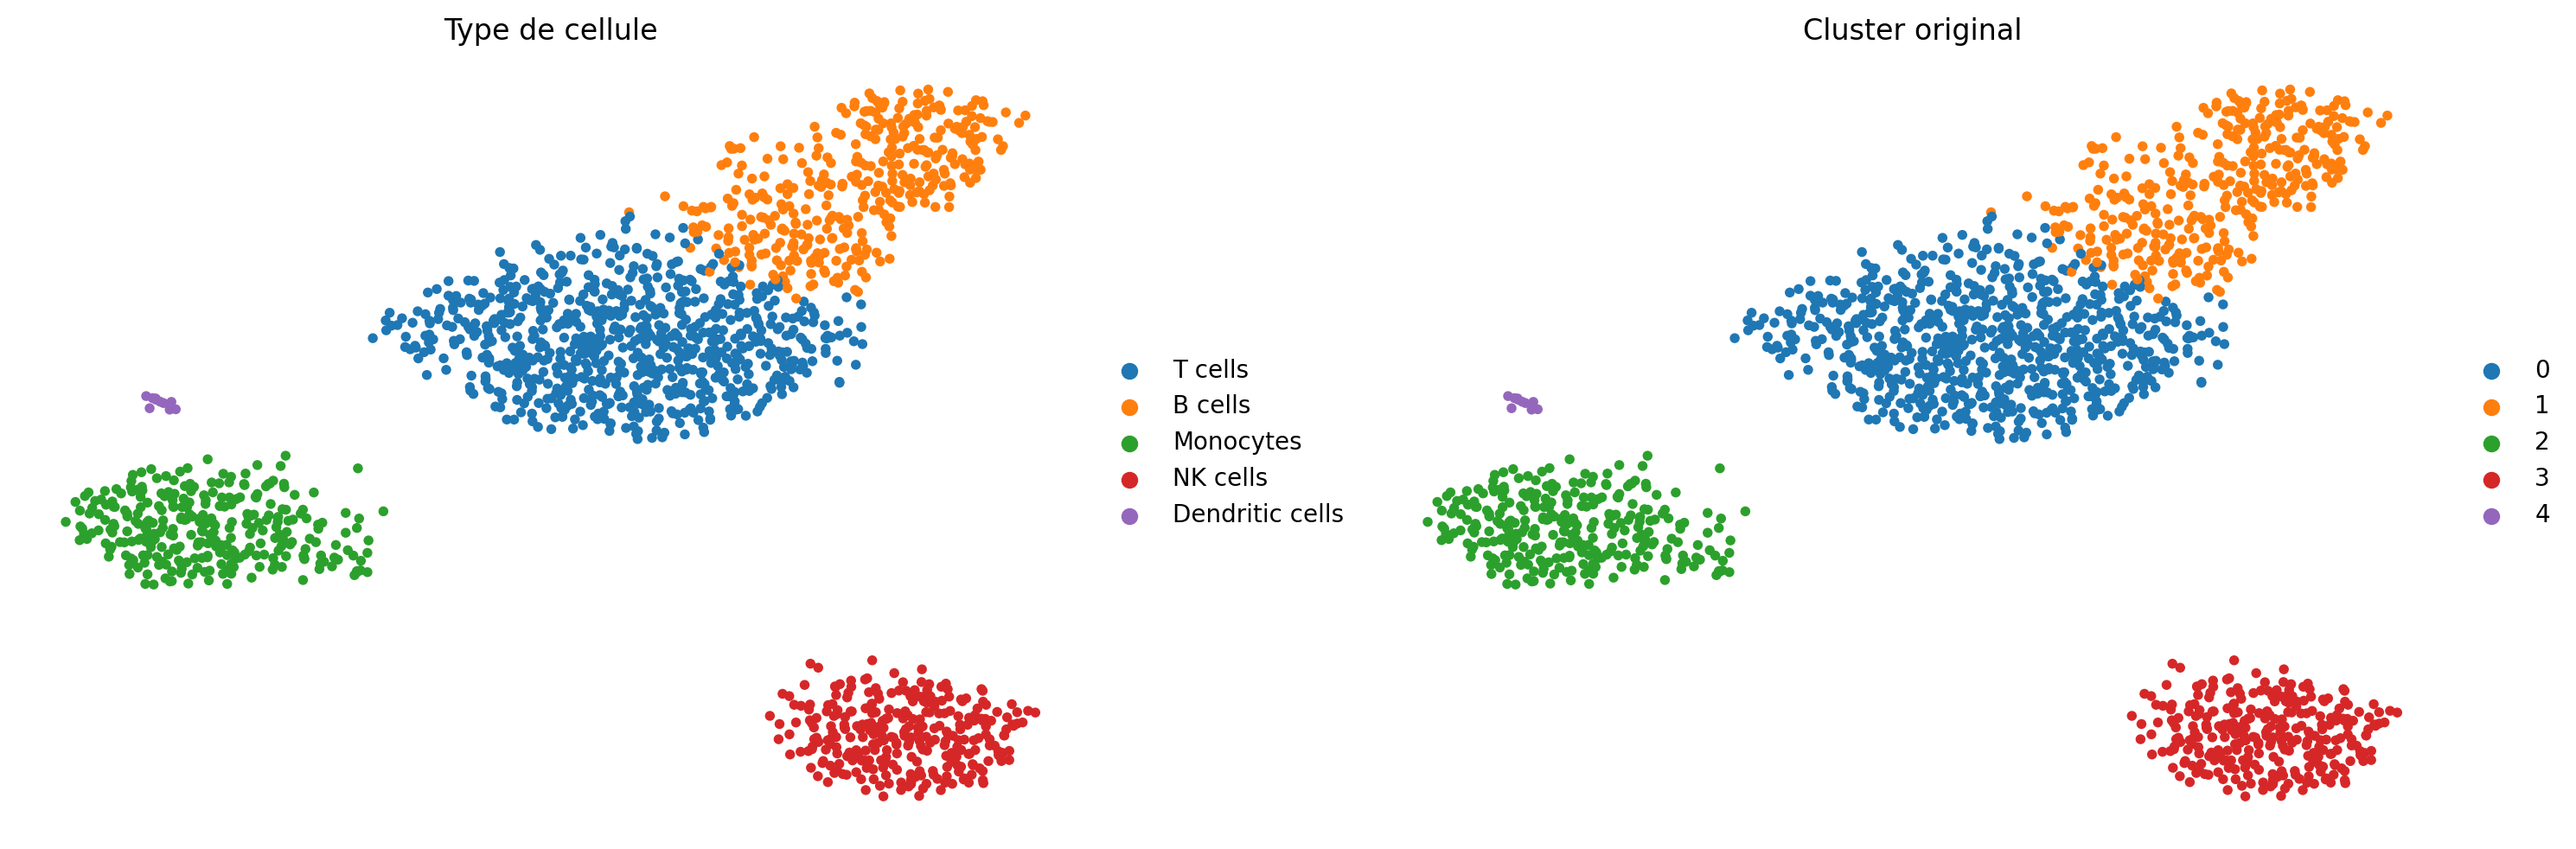

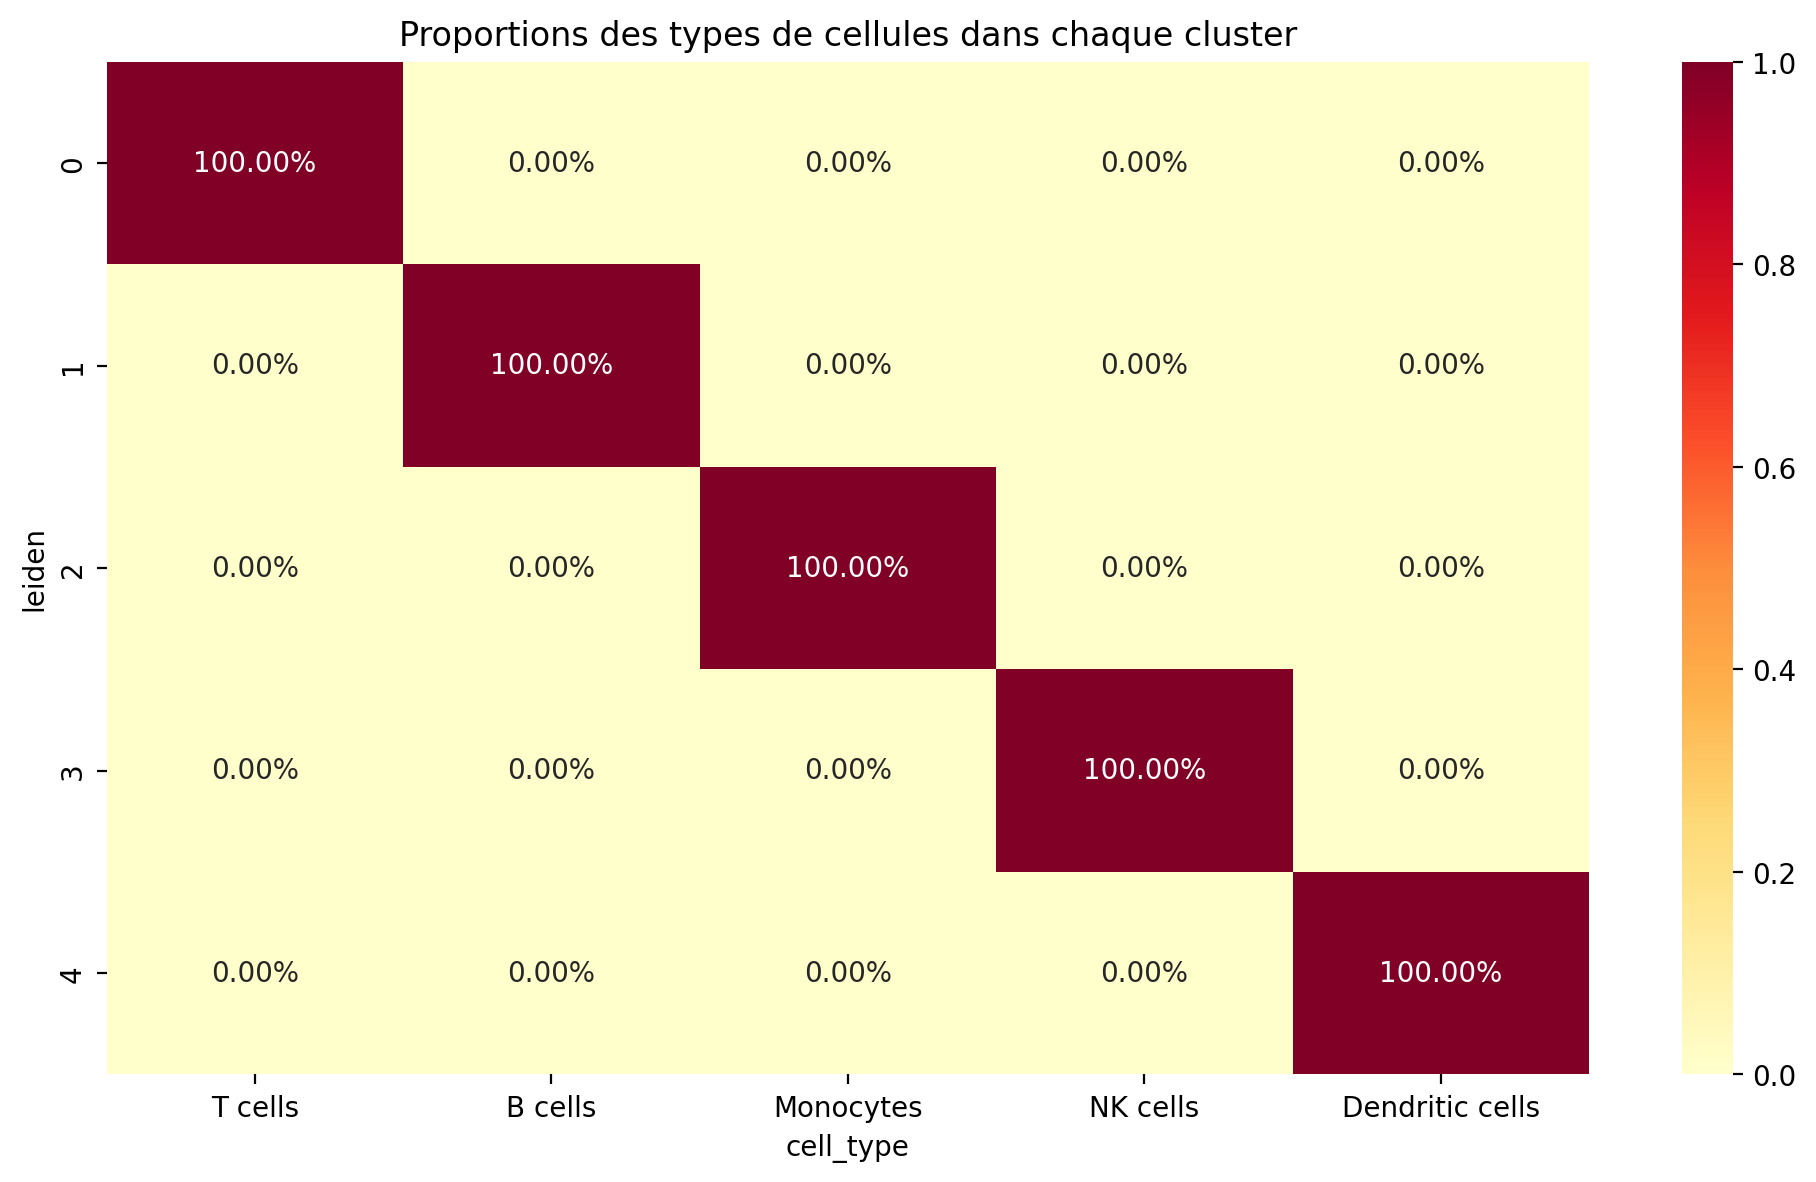

In [38]:
# Créer une figure avec deux sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Visualiser les transitions sur UMAP
sc.pl.umap(adata, color='cell_type', title='Type de cellule', ax=axs[0], show=False)
sc.pl.umap(adata, color='leiden', title='Cluster original', ax=axs[1], show=False)

plt.tight_layout()

# Calculer les proportions de cellules dans chaque cluster
cluster_proportions = pd.crosstab(adata.obs['leiden'], 
                                adata.obs['cell_type'], 
                                normalize='index')

# Afficher les proportions
print("\nProportions des types de cellules dans chaque cluster :")
print(cluster_proportions)

# Créer un heatmap des proportions
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_proportions, annot=True, cmap='YlOrRd', fmt='.2%')
plt.title('Proportions des types de cellules dans chaque cluster')
plt.tight_layout()

Analyse de la qualité des clusters :



Score de silhouette global : 0.578

Analyse de la cohérence des clusters :

T cells:
  - Nombre de cellules: 777
  - Distance moyenne au centre: 1.505
  - Écart-type des distances: 0.606

B cells:
  - Nombre de cellules: 375
  - Distance moyenne au centre: 1.438
  - Écart-type des distances: 0.603

Monocytes:
  - Nombre de cellules: 301
  - Distance moyenne au centre: 1.004
  - Écart-type des distances: 0.434

NK cells:
  - Nombre de cellules: 294
  - Distance moyenne au centre: 0.926
  - Écart-type des distances: 0.372

Dendritic cells:
  - Nombre de cellules: 11
  - Distance moyenne au centre: 0.137
  - Écart-type des distances: 0.066


<Figure size 1000x500 with 0 Axes>

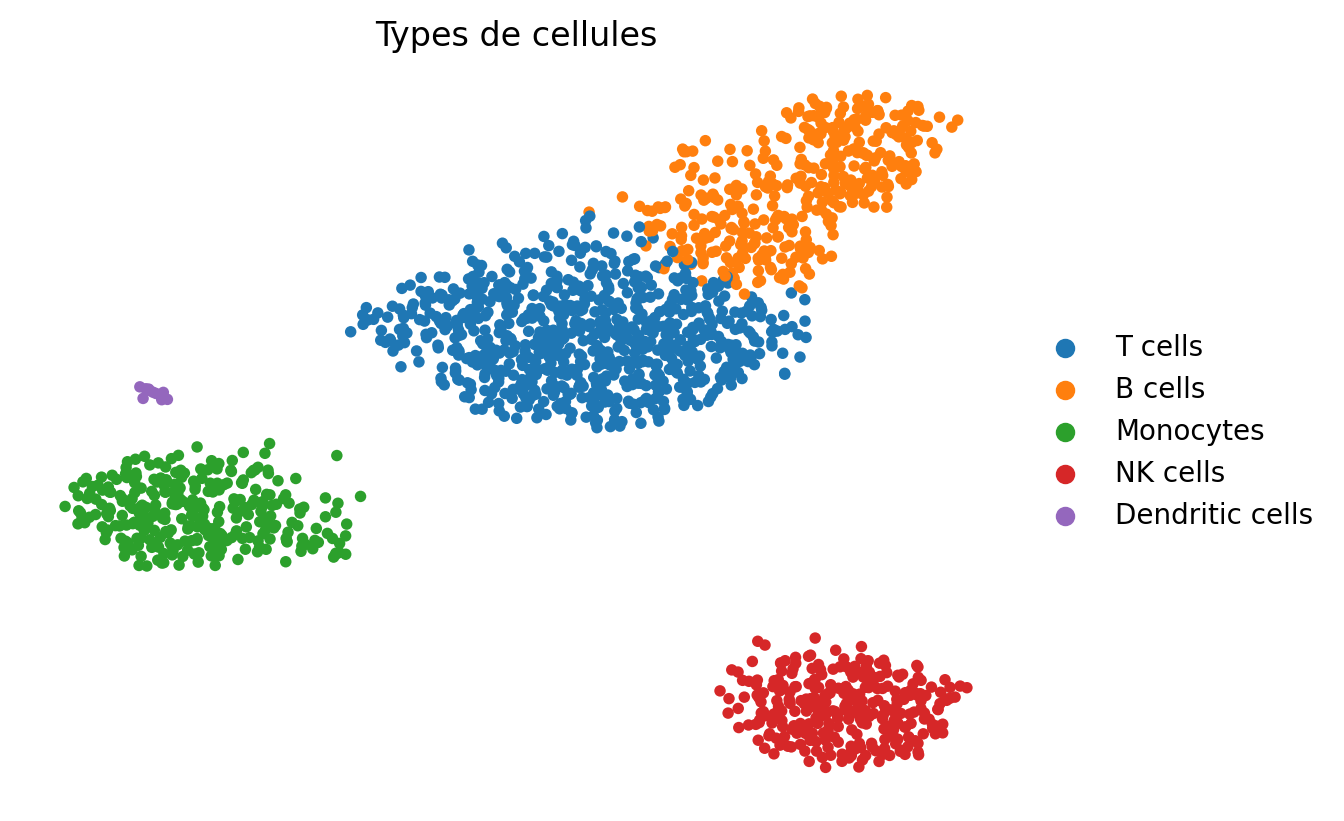

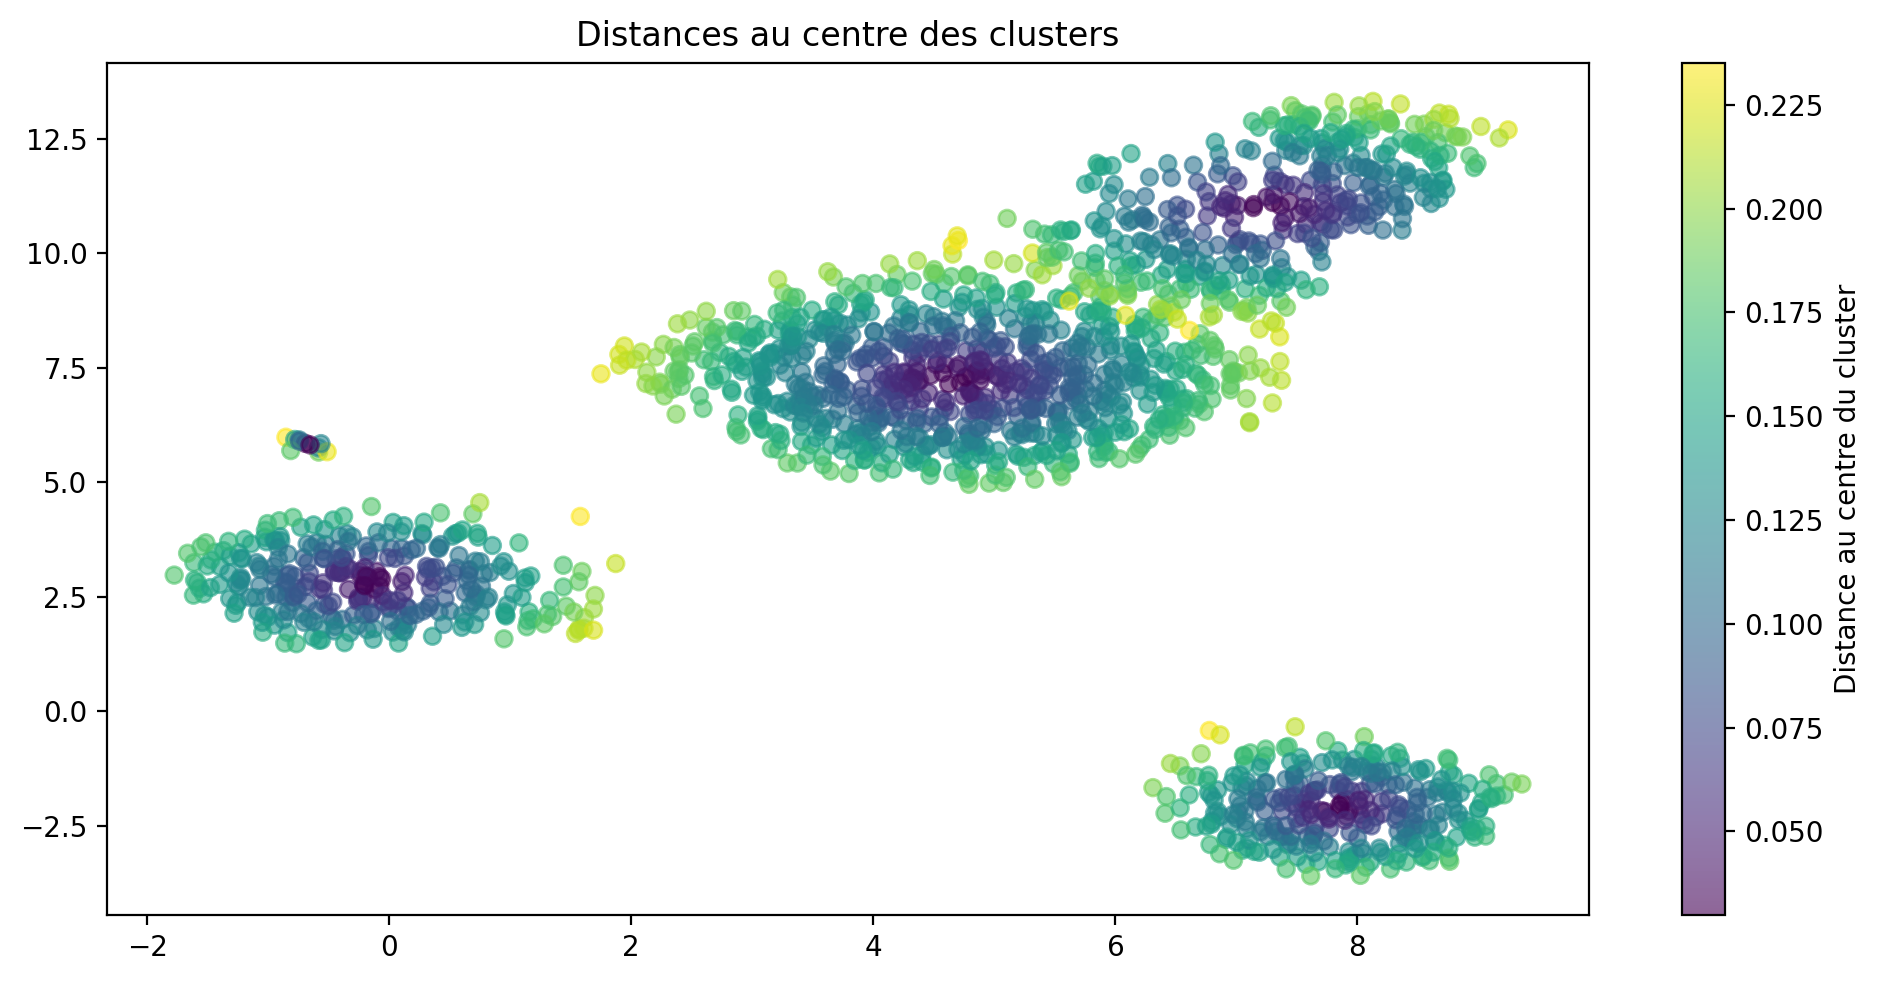

In [40]:
# Calculer le score de silhouette global
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(adata.obsm['X_umap'], adata.obs['cell_type'])
print(f"\nScore de silhouette global : {silhouette_avg:.3f}")

# Analyser la cohérence des clusters
print("\nAnalyse de la cohérence des clusters :")
for cell_type in adata.obs['cell_type'].unique():
    # Sélectionner les cellules du type actuel
    mask = adata.obs['cell_type'] == cell_type
    if sum(mask) > 1:
        # Calculer le centre du cluster
        cluster_center = np.mean(adata.obsm['X_umap'][mask], axis=0)
        # Calculer la distance moyenne des cellules au centre
        distances = np.sqrt(np.sum((adata.obsm['X_umap'][mask] - cluster_center)**2, axis=1))
        mean_distance = np.mean(distances)
        std_distance = np.std(distances)
        
        print(f"\n{cell_type}:")
        print(f"  - Nombre de cellules: {sum(mask)}")
        print(f"  - Distance moyenne au centre: {mean_distance:.3f}")
        print(f"  - Écart-type des distances: {std_distance:.3f}")

# Créer une figure pour la visualisation des types de cellules
plt.figure(figsize=(10, 5))
sc.pl.umap(adata, color='cell_type', title='Types de cellules', show=True)

# Créer une figure pour la visualisation des distances
plt.figure(figsize=(10, 5))
for cell_type in adata.obs['cell_type'].unique():
    mask = adata.obs['cell_type'] == cell_type
    if sum(mask) > 1:
        cluster_center = np.mean(adata.obsm['X_umap'][mask], axis=0)
        distances = np.sqrt(np.sum((adata.obsm['X_umap'][mask] - cluster_center)**2, axis=1))
        plt.scatter(adata.obsm['X_umap'][mask, 0], 
                   adata.obsm['X_umap'][mask, 1],
                   c=distances, 
                   alpha=0.6)

plt.colorbar(label='Distance au centre du cluster')
plt.title('Distances au centre des clusters')
plt.tight_layout()
plt.show()

## Sauvegarde des données

In [41]:
# Créer le dossier results s'il n'existe pas
import os
os.makedirs('results', exist_ok=True)

# Sauvegarder l'objet AnnData avec les annotations
adata.write('results/annotated_data.h5ad')

# Sauvegarder les métriques de qualité dans un fichier CSV
quality_metrics = pd.DataFrame({
    'cell_type': adata.obs['cell_type'].unique(),
    'n_cells': [sum(adata.obs['cell_type'] == ct) for ct in adata.obs['cell_type'].unique()],
    'mean_distance': [np.mean(np.sqrt(np.sum((adata.obsm['X_umap'][adata.obs['cell_type'] == ct] - 
                                            np.mean(adata.obsm['X_umap'][adata.obs['cell_type'] == ct], axis=0))**2, axis=1)))
                     for ct in adata.obs['cell_type'].unique()],
    'std_distance': [np.std(np.sqrt(np.sum((adata.obsm['X_umap'][adata.obs['cell_type'] == ct] - 
                                          np.mean(adata.obsm['X_umap'][adata.obs['cell_type'] == ct], axis=0))**2, axis=1)))
                    for ct in adata.obs['cell_type'].unique()]
})
quality_metrics.to_csv('results/cluster_quality_metrics.csv', index=False)

# Sauvegarder le plot des types de cellules
plt.figure(figsize=(10, 5))
sc.pl.umap(adata, color='cell_type', title='Types de cellules', show=False)
plt.savefig('results/cell_types_umap.png', dpi=300, bbox_inches='tight')
plt.close()

# Sauvegarder le plot des distances
plt.figure(figsize=(10, 5))
for cell_type in adata.obs['cell_type'].unique():
    mask = adata.obs['cell_type'] == cell_type
    if sum(mask) > 1:
        cluster_center = np.mean(adata.obsm['X_umap'][mask], axis=0)
        distances = np.sqrt(np.sum((adata.obsm['X_umap'][mask] - cluster_center)**2, axis=1))
        plt.scatter(adata.obsm['X_umap'][mask, 0], 
                   adata.obsm['X_umap'][mask, 1],
                   c=distances, 
                   alpha=0.6)
plt.colorbar(label='Distance au centre du cluster')
plt.title('Distances au centre des clusters')
plt.tight_layout()
plt.savefig('results/cluster_distances_umap.png', dpi=300, bbox_inches='tight')
plt.close()

print("\nRésultats sauvegardés dans le dossier 'results' :")
print("- annotated_data.h5ad : Données annotées complètes")
print("- cluster_quality_metrics.csv : Métriques de qualité des clusters")
print("- cell_types_umap.png : Visualisation des types de cellules")
print("- cluster_distances_umap.png : Visualisation des distances")


Résultats sauvegardés dans le dossier 'results' :
- annotated_data.h5ad : Données annotées complètes
- cluster_quality_metrics.csv : Métriques de qualité des clusters
- cell_types_umap.png : Visualisation des types de cellules
- cluster_distances_umap.png : Visualisation des distances


<Figure size 1000x500 with 0 Axes>

## Charger les résultats une nouvelle session

Résumé des données :
Nombre de cellules : 1758
Nombre de gènes : 1661

Types de cellules identifiés :
cell_type
T cells            777
B cells            375
Monocytes          301
NK cells           294
Dendritic cells     11
Name: count, dtype: int64

Métriques de qualité des clusters :
         cell_type  n_cells  mean_distance  std_distance
0          T cells      777       1.505091      0.605866
1          B cells      375       1.438449      0.602685
2        Monocytes      301       1.004321      0.434205
3         NK cells      294       0.926299      0.372148
4  Dendritic cells       11       0.137173      0.066082


<Figure size 1000x500 with 0 Axes>

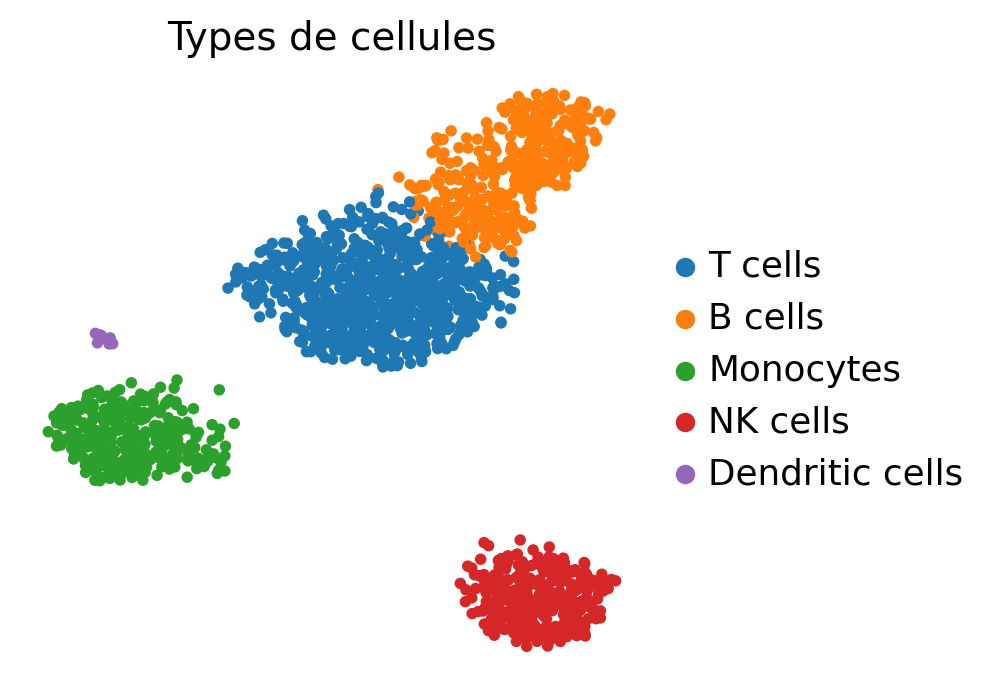

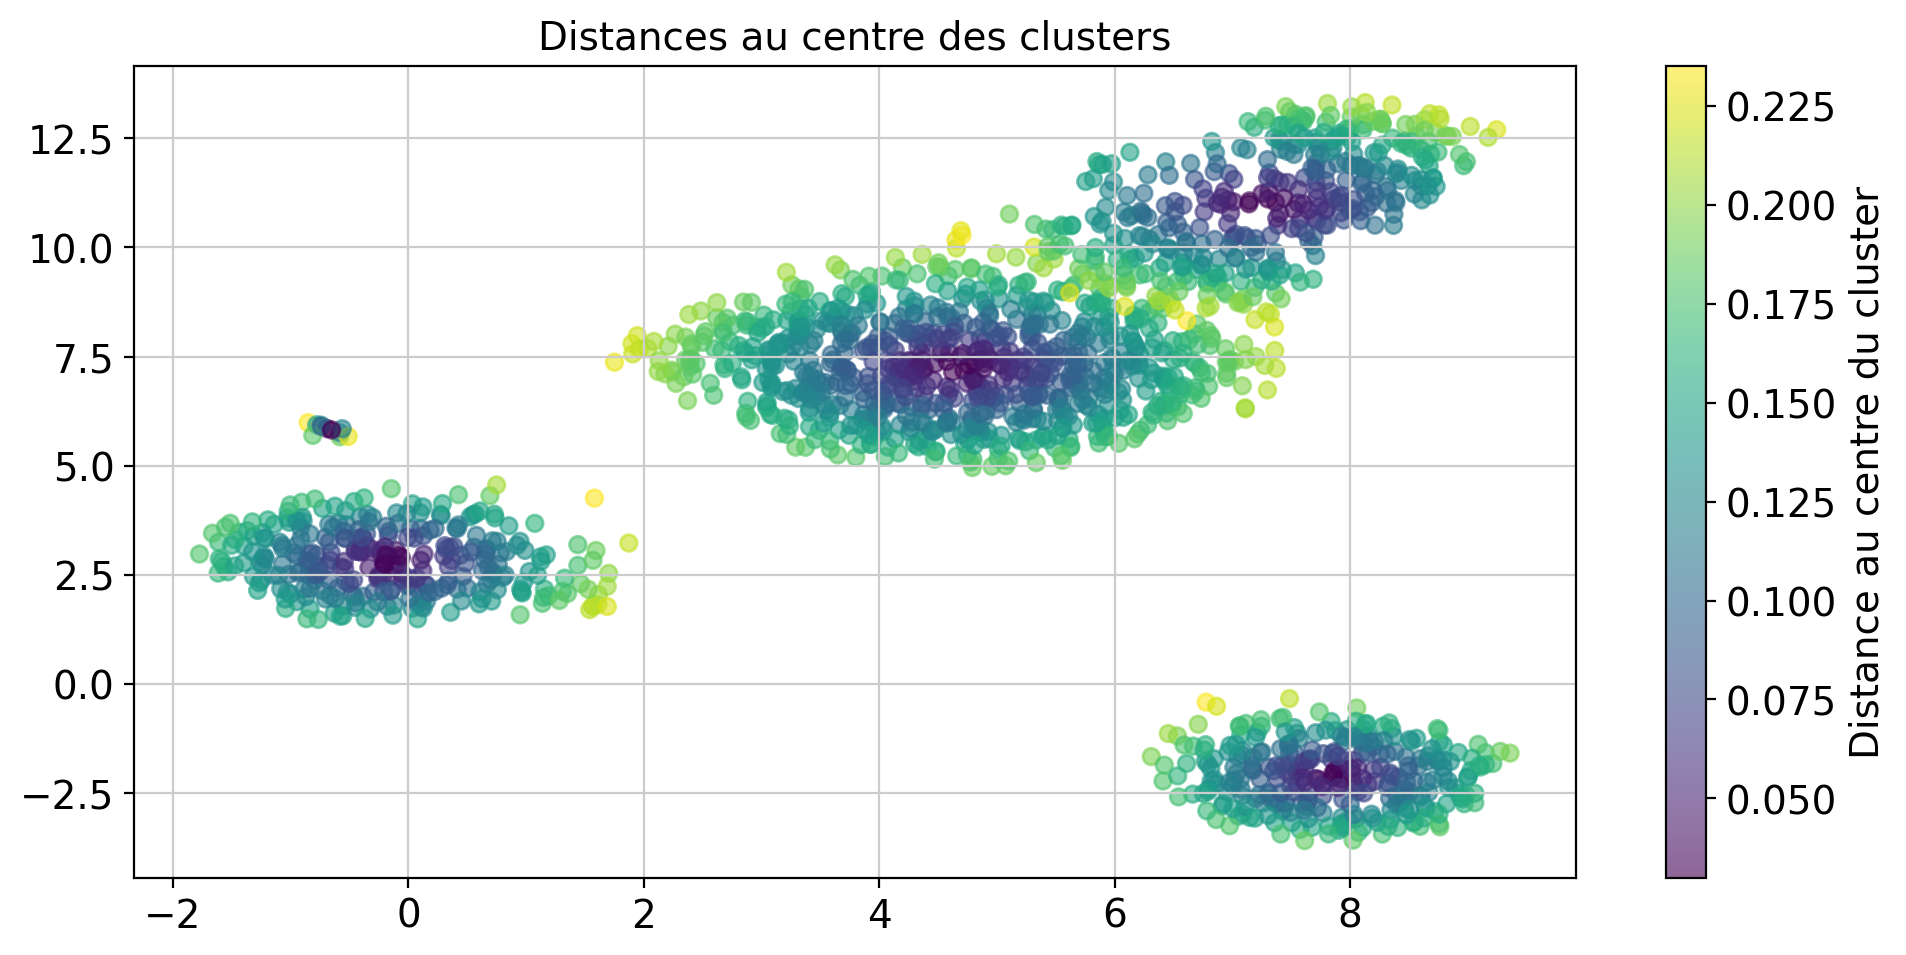

In [42]:
# Importer les bibliothèques nécessaires
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer les paramètres d'affichage
sc.settings.set_figure_params(dpi=100, frameon=False)
sc.settings.verbosity = 3

# Charger les données annotées
adata = sc.read('results/annotated_data.h5ad')

# Charger les métriques de qualité
quality_metrics = pd.read_csv('results/cluster_quality_metrics.csv')

# Afficher un résumé des données
print("Résumé des données :")
print(f"Nombre de cellules : {adata.n_obs}")
print(f"Nombre de gènes : {adata.n_vars}")
print("\nTypes de cellules identifiés :")
print(adata.obs['cell_type'].value_counts())

# Afficher les métriques de qualité
print("\nMétriques de qualité des clusters :")
print(quality_metrics)

# Visualiser les types de cellules
plt.figure(figsize=(10, 5))
sc.pl.umap(adata, color='cell_type', title='Types de cellules', show=True)

# Visualiser les distances au centre
plt.figure(figsize=(10, 5))
for cell_type in adata.obs['cell_type'].unique():
    mask = adata.obs['cell_type'] == cell_type
    if sum(mask) > 1:
        cluster_center = np.mean(adata.obsm['X_umap'][mask], axis=0)
        distances = np.sqrt(np.sum((adata.obsm['X_umap'][mask] - cluster_center)**2, axis=1))
        plt.scatter(adata.obsm['X_umap'][mask, 0], 
                   adata.obsm['X_umap'][mask, 1],
                   c=distances, 
                   alpha=0.6)
plt.colorbar(label='Distance au centre du cluster')
plt.title('Distances au centre des clusters')
plt.tight_layout()
plt.show()